# Проект: промышленность
# Описание проекта
Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Ваша задача — построить модель, которая будет её предсказывать. 

Заказчик хочет использовать разработанную модель для имитации технологического процесса. Ниже расскажем о деталях этого процесса. Их важно знать, прежде чем генерировать новые признаки.

# Описание этапа обработки
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

# Описание данных
Данные состоят из нескольких файлов, полученных из разных источников:
* `data_arc_new.csv` — данные об электродах;
* `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
* `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
* `data_gas_new.csv` — данные о продувке сплава газом;
* `data_temp_new.csv` — результаты измерения температуры;
* `data_wire_new.csv` — данные о проволочных материалах (объём);
* `data_wire_time_new.csv` — данные о проволочных материалах (время).

Файл `data_arc_new.csv`
* `key` — номер партии;
* `Начало нагрева дугой` — время начала нагрева;
* `Конец нагрева дугой` — время окончания нагрева;
* `Активная мощность` — значение активной мощности;
* `Реактивная мощность` — значение реактивной мощности.

Файл `data_bulk_new.csv`
* `key` — номер партии;
* `Bulk 1 … Bulk 15` — объём подаваемого материала.

Файл `data_bulk_time_new.csv`
* `key` — номер партии;
* `Bulk 1 … Bulk 15` — время подачи материала.

Файл `data_gas_new.csv`
* `key` — номер партии;
* `Газ 1` — объём подаваемого газа.

Файл `data_temp_new.csv`
* `key` — номер партии;
* `Время замера` — время замера;
* `Температура` — значение температуры.

Файл `data_wire_new.csv`
* `key` — номер партии;
* `Wire 1 … Wire 9` — объём подаваемых проволочных материалов.

Файл `data_wire_time_new.csv`
* `key` — номер партии;
* `Wire 1 … Wire 9` — время подачи проволочных материалов.

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

**Цель исследования**: Подготовить прогнозные модели для определения конечной температуры сплава во время технологического процесса.

**Задачи исследования**:
1. Ознакомиться с имеющимися в распоряжении данными.
2. Произвести предварительную обработку и анализ данных.
3. На основе имеющихся данных сгенерировать новые признаки описывающий технологический процесс
4. Провести анализ нового набора признаков.
5. Для решения задачи регрессии обучить модели и определить лучшую модель удовлетворяющую заданным критериям качества.<br>Заданный критерий качества: MAE ≤ 6.8.
6. Произвести анализ важности обучающих признаков.
7. Представить результат, сделать выводы и дать рекомендации заказчику.

<a id="point0"></a>
# Оглавление
* <a href="#Загрузка-и-изучение-данных">1 Загрузка и изучение данных</a>
  * <a href="#Загрузка-данных">1.1 Загрузка данных</a>
  * <a href="#Изучение-данных">1.2 Изучение данных</a>
* <a href="#Исследовательский-анализ-и-предобработка-данных">2 Исследовательский анализ и предобработка данных</a>
  * <a href="#Переименование-столбцов">2.1 Переименование столбцов</a>
  * <a href="#Анализ-датасета-'data_arc'">2.2 Анализ датасета 'data_arc'</a>
    * <a href="#Обработка-дубликатов">2.2.1 Обработка дубликатов</a>
    * <a href="#Обработка-пропусков">2.2.2 Обработка пропусков</a>
    * <a href="#Анализ-распределения-признаков">2.2.3 Анализ распределения признаков</a>
    * <a href="#Признак-'power_active'">2.2.3.1 Признак 'power_active'</a>
    * <a href="#Признак-'power_reactive'">2.2.3.2 Признак 'power_reactive'</a>
  * <a href="#Анализ-датасета-'data_bulk'">2.3 Анализ датасета 'data_bulk'</a>
    * <a href="#Обработка-дубликатов">2.3.1 Обработка дубликатов</a>
    * <a href="#Обработка-пропусков">2.3.2 Обработка пропусков</a>
    * <a href="#Анализ-распределения-признаков">2.3.3 Анализ распределения признаков</a>
    * <a href="#Признаки-'bulk_x'">2.3.3.1 Признаки 'bulk_x'</a>
  * <a href="#Анализ-датасета-'data_bulk_time'">2.4 Анализ датасета 'data_bulk_time'</a>
  * <a href="#Анализ-датасета-'data_gas'">2.5 Анализ датасета 'data_gas'</a>
    * <a href="#Обработка-дубликатов">2.5.1 Обработка дубликатов</a>
    * <a href="#Обработка-пропусков">2.5.2 Обработка пропусков</a>
    * <a href="#Анализ-распределения-признаков">2.5.3 Анализ распределения признаков</a>
    * <a href="#Признак-'gas'">2.5.3.1 Признак 'gas'</a>
  * <a href="#Анализ-датасета-'data_temp'">2.6 Анализ датасета 'data_temp'</a>
    * <a href="#Обработка-дубликатов">2.6.1 Обработка дубликатов</a>
    * <a href="#Обработка-пропусков">2.6.2 Обработка пропусков</a>
    * <a href="#Анализ-распределения-признаков">2.6.3 Анализ распределения признаков</a>
    * <a href="#Признак-'temp'">2.6.3.1 Признак 'temp'</a>
  * <a href="#Анализ-датасета-'data_wire'">2.7 Анализ датасета 'data_wire'</a>
    * <a href="#Обработка-дубликатов">2.7.1 Обработка дубликатов</a>
    * <a href="#Обработка-пропусков">2.7.2 Обработка пропусков</a>
    * <a href="#Анализ-распределения-признаков">2.7.3 Анализ распределения признаков</a>
    * <a href="#Признаки-'wire_x'">2.7.3.1 Признаки 'wire_x'</a>
  * <a href="#Анализ-датасета-'data_wire_time'">2.8 Анализ датасета 'data_wire_time'</a>
* <a href="#Создание-новых-признаков">3 Создание новых признаков</a>
  * <a href="#Датасет-'data_arc'">3.1 Датасет 'data_arc'</a>
  * <a href="#Датасет-'data_bulk'">3.2 Датасет 'data_bulk'</a>
  * <a href="#Датасет-'data_gas'">3.3 Датасет 'data_gas'</a>
  * <a href="#Датасет-'data_temp'">3.4 Датасет 'data_temp'</a>
  * <a href="#Датасет-'data_wire'">3.5 Датасет 'data_wire'</a>
* <a href="#Объединение-данных">4 Объединение данных</a>
* <a href="#Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма">5 Исследовательский анализ и предобработка данных объединённого датафрейма</a>
  * <a href="#Признак-'power_full'">5.1 Признак 'power_full'</a>
  * <a href="#Признак-'heat_duration'">5.2 Признак 'heat_duration'</a>
  * <a href="#Признак-'energy_full'">5.3 Признак 'energy_full'</a>
  * <a href="#Признак-'cos_phi'">5.4 Признак 'cos_phi'</a>
  * <a href="#Признак-'power_ratio'">5.5 Признак 'power_ratio'</a>
  * <a href="#Признак-'gas'">5.6 Признак 'gas'</a>
  * <a href="#Признак-'temp_start'">5.7 Признак 'temp_start'</a>
  * <a href="#Признак-'temp_final'">5.8 Признак 'temp_final'</a>
  * <a href="#Признак-'temp_duration'">5.9 Признак 'temp_duration'</a>
  * <a href="#Группа-признаков-'bulk_x'">5.10 Группа признаков 'bulk_x'</a>
  * <a href="#Группа-признаков-'wire_x'">5.11 Группа признаков 'wire_x'</a>
* <a href="#Корреляционный-анализ">6 Корреляционный анализ</a>
* <a href="#Обучение-моделей-машинного-обучения">7 Обучение моделей машинного обучения</a>
  * <a href="#Подготовка-данных">7.1 Подготовка данных</a>
  * <a href="#Обучение-линейных-моделей">7.2 Обучение линейных моделей</a>
  * <a href="#Обучение-ансамблевых-моделей">7.3 Обучение ансамблевых моделей</a>
  * <a href="#Анализ-результата-и-выбор-лучшей-модели">7.4 Анализ результата и выбор лучшей модели</a>
  * <a href="#Оценка-качества-модели-на-тестовых-данных">7.5 Оценка качества модели на тестовых данных</a>
  * <a href="#Проверка-модели-на-адекватность">7.6 Проверка модели на адекватность</a>
  * <a href="#Анализ-важности-признаков">7.7 Анализ важности признаков</a>
* <a href="#Общий-вывод-и-рекомендации-заказчику">8 Общий вывод и рекомендации заказчику</a>

## Загрузка и изучение данных
Импорт необходимых для выполнения проекта библиотек:

In [1]:
!pip install phik -q
!pip install shap -q

In [2]:
import pandas as pd # Библиотека pandas
import matplotlib.pyplot as plt # Библиотека для работы с графиками
import numpy as np # Библиотека NumPy
from scipy import stats # Библиотека статистических функций из библиотеки SciPy

from phik import phik_matrix # Библиотека матрицы корреляции Фи
from phik.report import plot_correlation_matrix # Функция отображения матрицы корреляции

from sklearn.model_selection import (train_test_split, # Функция для разбивки датасета на выборки
                                     GridSearchCV) # Инструмент автоматизированного поиска гиперпараметров

from sklearn.compose import ColumnTransformer # Импорт инструмента подготовки данных
from sklearn.preprocessing import (StandardScaler, # Масштабирование: стандартизация
                                   MinMaxScaler) # Масштабирование: нормализация

from sklearn.pipeline import Pipeline # Pipeline
from sklearn.metrics import mean_absolute_error # Метрика MAE

# Модели МО:
from sklearn.linear_model import LinearRegression # Линейная регрессия 
from sklearn.svm import LinearSVR # Линейная SVM
from sklearn.ensemble import RandomForestRegressor # Случайный лес
from catboost import CatBoostRegressor # Модель CatBoost
from sklearn.dummy import DummyRegressor # Модель Dummy

# Обработка предупреждений:
import warnings
from sklearn.exceptions import ConvergenceWarning

import shap # Инструмент оценки значимости признаков SHAP

from sklearn.model_selection import cross_val_score # Функция кросс-валидации
import time # Импорт модуля, который предоставляет функции для работы со временем

Установка вспомогательных настроек, функций и констант:

In [3]:
# формат вывода float-чисел датафрейма:
pd.options.display.float_format = ("{:.2f}".format)

# настройка отображения графиков:
plt.rcParams["figure.figsize"] = (15,7) # размер графиков по умолчанию:
plt.rcParams.update({'axes.grid' : True, 'grid.alpha': 0.33, 'grid.linestyle': '--'}) # отображение сетки:

# установка цветовой палитры:
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# переменные для форматирования шрифта при выводе информации:
green, red, bold, end = '\33[92m', '\33[91m', '\33[1m', '\33[0m'

# создание переменной псевдослучайности
RANDOM_STATE = 50525

# заданный минимальный порог температуры
MELTING_THRESHOLD = 1400

def dataset_info(df):
    """Функция для вывода общей информации о датасете"""
    print('• ' + '\33[4m' + 'Первые 10 строк датасета:' + end, f'[{df.dsc}]')
    display(df.head(10))
    print('• ' + '\33[4m' + 'Основная информация о датасете:' + end, f'[{df.dsc}]')
    df.info()

def is_that_snake(list_of_strings):
    """
    Данная функция получает на входе список со строковыми значениями (например, список заголовков датафрейма)
    и поочередно проверяет наличие НЕжелательных для оформления символов.
    Желательные символы: английский алфавит в нижнем регистре, нижнее подчеркивание и цифры от 0 до 9
    """
    snake_symbols, bad_list = list('abcdefghijklmnopqrstuvwxyz_0123456789'), []
    for i in list_of_strings:
        if set(i).issubset(snake_symbols): # проверка, что все элементы подмножества i
            pass                           # принадлежат множеству snake_symbols
        else: bad_list.append(i)
    return f'(!) Следует обратить внимание: {bad_list}' if bad_list else '✅ Проблем не обнаружено'

def stat_num(data_set, feature, rv=2, bins=50):
    """
    Функция отображения распределения числового признака.
    Для непрерывных величин строится диаграммы размаха и гистограммы распределения.
    Выводится описательная информация.
    """
    param = data_set[feature]
    dsr = param.describe()
    iqr = dsr['75%'] - dsr['25%']
    
    kde = stats.gaussian_kde(param)
    xx = np.linspace(dsr['min'], dsr['max'], bins)
    
    # конфигурация графиков:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    # диаграмма размаха:
    param.plot(kind='box', ax=axes[0])
    axes[0].set_title('Разброс значений признака')
    axes[0].set_ylabel(feature_dsc[feature])
    
    # гистограмма:
    bns =  plt.hist(param, bins=bins, orientation='horizontal')
    scale = max(bns[0]) / max(kde(xx))
    # масштабированная линия плотности:
    plt.plot(0.9 * scale * kde(xx), xx)
    axes[1].set_title('Гистограмма распределения')
    axes[1].set_xlabel('Частота')
    axes[1].axhline(dsr['mean'], color='r', linestyle='--', label='Среднее значение')
    axes[1].axhline(dsr['50%'], color='r', linestyle=':', label='Медиана')
    axes[1].legend()
    plt.show()
    
    # описательная информация:
    print(f"Описательная информация для признака '{feature}':")
    print(bold + "Минимальное значение:" + end, 
          round(dsr['min'], 2), bold + "\t|\tМаксимальное значение:" + end, round(dsr['max'], 2))
    print(bold + "Среднее значение:" + end, f"{round(dsr['mean'], rv)}")
    print(bold + "Медиана:" + end, round(dsr['50%'], 2))
    print(bold + "Межквартильный размах IQR:" + end, round(iqr, rv))
    print(bold + "Границы нормальных значений:" + end, 
          f"от {round(max([dsr['25%'] - 1.5*iqr, dsr['min']]), rv)} до",
          f"{round(min([dsr['75%'] + 1.5*iqr, dsr['max']]), rv)}")
    
def features_mean_sum(df):
    """
    Функция отображает столбчатые графики средних и суммарных значений набора признаков.
    Также предоставляет данные в виде таблицы.
    """
    feat_mean  = [df[i].mean() for i in df.columns if '_' in i]
    feat_sum   = [df[i].sum()  for i in df.columns if '_' in i]
    feat_title = df[[i for i in df.columns if '_' in i]].columns
    
    plt.bar(x=feat_title, height=feat_sum,  label='Суммарные значения')
    plt.bar(x=feat_title, height=feat_mean, label='Средние значения')
    
    plt.yscale('log')
    plt.title(f"Распределение суммарного и среднего значений признаков {df.dsc[5:]}_x")
    plt.xlabel('Наименование признака')
    plt.ylabel('Значение признака\n* (логарифмическая шкала)')
    plt.legend()
    plt.show()
    
    display(pd.DataFrame({'mean':feat_mean, 'sum' :feat_sum}, index=feat_title).T)
    
def show_heat_map(phik_overview, title):
    """
    Функция для отрисовки тепловой карты для матрицы корреляции
    """
    plot_correlation_matrix(
        phik_overview.values,
        x_labels=phik_overview.columns,
        y_labels=phik_overview.index,
        vmin=0, vmax=1, color_map='Oranges',
        title='Матрица корреляции $\phi_K$ для группы признаков' + title,
        fontsize_factor=1.5,
        figsize=(20, 13)
    )
    plt.grid(visible=False)
    plt.show()
    
def multicol_check(df, threshold=0.9):
    """
    Функция для проверки мультиколлинеарности признаков
    на основе данных матрицы корреляции
    """
    # список для фиксации количества превышений phi >= 0.9:
    phi_list = []

    # перебор признаков df:
    for c in df.columns:
        high_phi_list = df[df[c] >= threshold].drop(c).index.tolist()
        high_phi_len = len(high_phi_list)

        # добавляем значения: [признак, количество превышений]
        phi_list.append([c, high_phi_len, high_phi_list])

    # отображаем данные в виде датафрейма:
    df_phi = pd.DataFrame(data=phi_list, 
                          columns=['Признак', 'Количество превышений', 'Мультиколлинеарные признаки'])
    display(df_phi[df_phi['Количество превышений'] != 0])

    # выводим итог:
    print(f"Всего признаков с мультиколлинеарностью: {df_phi[df_phi['Количество превышений'] > 0].shape[0]}")
    
def show_gs_result(data, n=5):
    """
    Показывает N лучших по метрике моделей среди результатов GridSearchCV
    """
    result = pd.DataFrame(data.cv_results_).sort_values('rank_test_score')[
    ['rank_test_score', 'param_models', 'mean_test_score','mean_fit_time','params']
    ]
    result['mean_test_score'] = -result['mean_test_score']
    result['param_models'] = (result['param_models']
                                  .astype('str')
                                  .str.replace('<catboost.*>','CatBoostRegressor', regex=True)
                                  .str.replace(r'\([\s\S]*', '', regex=True))
    return result.head(n)

def models_compare(df):
    """
    Визуализация сравнительных характеристик моделей:
    mean_test_score, mean_fit_time, time_pred
    """
    # Создаем график
    fig, ax1 = plt.subplots()  # Увеличиваем ширину для читаемости
    
    # Настройки для столбцов
    width = 0.15  # Уменьшаем ширину столбцов, чтобы вместить три
    x = range(df.shape[0])  # Позиции по оси X
    
    # Левая ось Y: mean_test_score
    ax1.bar([i - width for i in x], df['mean_test_score'], width, color=color_list[0], label='Средняя метрика')
    ax1.set_xlabel('Наименование моделей')
    ax1.set_ylabel('Метрика MAE')
    ax1.tick_params(axis='y')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['param_models'])
    
    # Правая ось Y: mean_fit_time и time_pred
    ax2 = ax1.twinx()  # Создаем вторую ось Y
    ax2.bar([i for i in x], df['mean_fit_time'], width, color=color_list[1], label='Среднее время обучения')
    ax2.set_ylabel('Время (секунды)')
    ax2.tick_params(axis='y')
    
    # Заголовок и легенда
    plt.title('Сравнительные характеристики моделей')
    fig.legend(loc='upper center', bbox_to_anchor=(0.3, 0.94))  # Увеличиваем ncol до 3
    
    # Показываем график
    plt.tight_layout()
    plt.grid(visible=False)
    plt.show()

<a href="#point0">Вернуться к оглавлению</a>

### Загрузка данных
Загрузим данные в датафреймы:

In [4]:
data_arc       = pd.read_csv('/datasets/data_arc_new.csv')
data_bulk      = pd.read_csv('/datasets/data_bulk_new.csv')
data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
data_gas       = pd.read_csv('/datasets/data_gas_new.csv')
data_temp      = pd.read_csv('/datasets/data_temp_new.csv')
data_wire      = pd.read_csv('/datasets/data_wire_new.csv')
data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')

<a href="#point0">Вернуться к оглавлению</a>

### Изучение данных
Для удобства и наглядности информации зададим имеющимся датасетам свойства с именами:

In [5]:
data_arc.dsc       = 'data_arc'
data_bulk.dsc      = 'data_bulk'
data_bulk_time.dsc = 'data_bulk_time'
data_gas.dsc       = 'data_gas'
data_temp.dsc      = 'data_temp'
data_wire.dsc      = 'data_wire'
data_wire_time.dsc = 'data_wire_time'

Выведем общую информацию об имеющихся датасетах:

In [6]:
for d in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    dataset_info(d)
    print('\n* * *\n')

• Первые 10 строк датасета: [data_arc]


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.38,0.22
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.26,0.21
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.71,0.48
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.79,0.54
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.10,0.82


• Основная информация о датасете: [data_arc]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB

* * *

• Первые 10 строк датасета: [data_bulk]


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,150.00,154.00
1,2,NaN,NaN,NaN,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,149.00,154.00
2,3,NaN,NaN,NaN,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.00,NaN,152.00,153.00
3,4,NaN,NaN,NaN,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,153.00,154.00
4,5,NaN,NaN,NaN,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,NaN,151.00,152.00
5,6,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.00,NaN,201.00,154.00
6,7,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.00,NaN,152.00,154.00
7,8,NaN,NaN,NaN,99.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.00,NaN,252.00,153.00
8,9,NaN,NaN,NaN,117.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.00,NaN,99.00,203.00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,NaN,102.00,204.00


• Основная информация о датасете: [data_bulk]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB

* * *

• Первые 10 строк датасета: [data_bulk_time]


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


• Основная информация о датасете: [data_bulk_time]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB

* * *

• Первые 10 строк датасета: [data_gas]


,key,Газ 1
0,1,29.75
1,2,12.56
2,3,28.55
3,4,18.84
4,5,5.41
5,6,11.27
6,7,9.84
7,8,15.17
8,9,8.22
9,10,6.53


• Основная информация о датасете: [data_gas]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

* * *

• Первые 10 строк датасета: [data_temp]


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.00
1,1,2019-05-03 11:07:18,1604.00
2,1,2019-05-03 11:11:34,1618.00
3,1,2019-05-03 11:18:04,1601.00
4,1,2019-05-03 11:25:59,1606.00
5,1,2019-05-03 11:30:38,1613.00
6,2,2019-05-03 11:34:04,1581.00
7,2,2019-05-03 11:38:40,1577.00
8,2,2019-05-03 11:46:09,1589.00
9,2,2019-05-03 11:49:38,1604.00


• Основная информация о датасете: [data_temp]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB

* * *

• Первые 10 строк датасета: [data_wire]


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.24,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.11,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.39,9.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.24,12.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


• Основная информация о датасете: [data_wire]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

* * *

• Первые 10 строк датасета: [data_wire_time]


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


• Основная информация о датасете: [data_wire_time]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB

* * *



Признак `key` во всех представленных датасетах содержит информацию о номере партии. 

Проверим насколько уникальны эти значения:

In [7]:
my_dict = {}
for d in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    my_dict[d.dsc] = len(d['key'].unique())
    
print('Количество уникальных значений партий:')
pd.Series(my_dict).sort_values(ascending=False)

Количество уникальных значений партий:


data_gas          3239
data_temp         3216
data_arc          3214
data_bulk         3129
data_bulk_time    3129
data_wire         3081
data_wire_time    3081
dtype: int64

Больше всего уникальных значений номеров партий содержит датасет `data_gas` (3239), датасет с целевым признаком содержит немного меньше значений (3216). Остальные датасеты - еще меньшее количество.

Проверим уникальность значений номеров партий по сравнению с датасетом целевого признака:

In [8]:
my_dict = {}
for d in [data_arc, data_bulk, data_bulk_time, data_gas, data_wire, data_wire_time]:
    my_dict[d.dsc] = [len(set(d['key'].unique()) - set(data_temp['key'].unique())), 
                      len(set(data_temp['key'].unique()) - set(d['key'].unique()))]

pd.DataFrame({'data_x': my_dict.keys(),
              'Уникальные для data_x'   : [i[0] for i in my_dict.values()],
              'Уникальные для data_temp': [i[1] for i in my_dict.values()]
             })

,data_x,Уникальные для data_x,Уникальные для data_temp
0,data_arc,0,2
1,data_bulk,0,87
2,data_bulk_time,0,87
3,data_gas,25,2
4,data_wire,0,135
5,data_wire_time,0,135


Как видим, лишь датасет `data_gas` содержит 25 уникальных значений, которых нет в `data_temp`, в остальных датасетах таких уникальных данных больше нет. 

Вместе с тем, во всех датасетах есть недостающие номера партий относительно `data_temp`, количество которых варьируется от 2 до 135. 

На этапе предобработки данных необходимо будет отобрать лишь номера тех партий, которые содержатся во всех датасетах. Предварительно оценим количество одинаковых партий:

In [9]:
def common_values(df_list, feature=False):
    """
    Функция для определения пересечения значений признака среди набора датасетов
    """
    # Получаем множества уникальных значений key для каждого датасета
    if feature:
        unique_vls = [set(df[feature].unique()) for df in df_list]
    else:
        unique_vls = [set(df.index.tolist()) for df in df_list]
    
    
    # Находим пересечение всех множеств
    common_vls = set.intersection(*unique_vls)
    
    return common_vls


df_list = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]
feature = 'key'
print("Общих значений 'key' среди набора датасетов:", len(common_values(df_list, feature)))

Общих значений 'key' среди набора датасетов: 3022


**Выводы**:
* Данные представлены в виде 7 датасетов: `data_arc`, `data_bulk`, `data_bulk_time`, `data_gas`, `data_temp`, `data_wire`, `data_wire_time`.
* Датасет `data_arc`:
  * Состоит из 14876 строк и 5 столбцов:
    * `key` — номер партии;
    * `Начало нагрева дугой` — время начала нагрева;
    * `Конец нагрева дугой` — время окончания нагрева;
    * `Активная мощность` — значение активной мощности;
    * `Реактивная мощность` — значение реактивной мощности.
  * Содержит 3214 уникальных значений номеров партии
  * Не содержит пропусков.
  * Наименования столбцов соответствуют описанию.

* Датасет `data_bulk`:
  * Состоит из 3129 строк и 16 столбцов:
    * `key` — номер партии;
    * `Bulk 1`... `Bulk 15` — объём подаваемого материала;
  * Содержит 3129 уникальных значений номеров партии
  * Все признаки за исключением `key` содержат разное количество пропусков.
  * Наименования столбцов соответствуют описанию.

* Датасет `data_bulk_time`:
  * Состоит из 3129 строк и 16 столбцов:
    * `key` — номер партии;
    * `Bulk 1`... `Bulk 15` — время подачи материала;
  * Содержит 3129 уникальных значений номеров партии
  * Все признаки за исключением `key` содержат разное количество пропусков.
  * Наименования столбцов соответствуют описанию.

* Датасет `data_gas`:
  * Состоит из 3239 строк и 2 столбца:
    * `key` — номер партии;
    * `Газ 1` — объём подаваемого газа;
  * Содержит 3239 уникальных значений номеров партии
  * Не содержит пропусков.
  * Наименования столбцов соответствуют описанию.

* Датасет `data_temp`:
  * Состоит из 18092 строк и 3 столбцов:
    * `key` — номер партии;
    * `Время замера` — время замера;
    * `Температура` — значение температуры;
  * Содержит 3216 уникальных значений номеров партии
  * Целевой признак содержит пропуски.
  * Наименования столбцов соответствуют описанию.

* Датасет `data_wire`:
  * Состоит из 3081 строк и 10 столбцов:
    * `key` — номер партии;
    * `Wire 1` ... `Wire 9` — объём подаваемых проволочных материалов;
  * Содержит 3081 уникальных значений номеров партии
  * Все признаки за исключением `key` содержат разное количество пропусков.
  * Наименования столбцов соответствуют описанию.

* Датасет `data_wire_time`:
  * Состоит из 3081 строк и 10 столбцов:
    * `key` — номер партии;
    * `Wire 1` ... `Wire 9` — время подачи проволочных материалов;
  * Содержит 3081 уникальных значений номеров партии
  * Все признаки за исключением `key` содержат разное количество пропусков.
  * Наименования столбцов соответствуют описанию.
* Количество общих значений признака `key` (номер партии) среди набора датасетов: 3022
* Среди данных присутсвуют признаки указанные на кириллице.
* Имеющиеся данные соответствуют описанию и структуре, заявленным заказчиком.
* Значения ячеек выглядят реалистично.
* Значения ячеек выглядят уникально.

<a href="#point0">Вернуться к оглавлению</a>

## Исследовательский анализ и предобработка данных

### Переименование столбцов
Отобразим заголовки столбцов для наших данных:

In [10]:
print("Заголовки датасетов:")
for d in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    print('•', bold + d.dsc + end, d.columns.to_list())

Заголовки датасетов:
• data_arc ['key', 'Начало нагрева дугой', 'Конец нагрева дугой', 'Активная мощность', 'Реактивная мощность']
• data_bulk ['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']
• data_bulk_time ['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']
• data_gas ['key', 'Газ 1']
• data_temp ['key', 'Время замера', 'Температура']
• data_wire ['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']
• data_wire_time ['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']


Для датасетов `data_arc`, `data_gas`, `data_temp` необходимо преобразовать названия заголовков используя латинский алфавит. Используем следующую схему переименования:

Текущий заголовок | Перевод | Новый заголовок
----- | ----- |:-----
Начало нагрева дугой | Start of arc heating time | `arc_time_start`
Конец нагрева дугой | End of arc heating time | `arc_time_end`
Активная мощность | Active power | `power_active`
Реактивная мощность | Reactive power | `power_reactive`
Газ 1 | Gas 1 | `gas`
Время замера | Temperature measurement time | `temp_time`
Температура | Temperature | `temp`

Для датасетов `data_bulk`, `data_bulk_time`, `data_wire`, `data_wire_time` - преобразовать заголовки к нижнему регистру и заменить пробел на нижнее подчеркивание.

Для датасетов `data_bulk_time`, `data_wire_time` - чтобы в общем списке признаков не перепутать признаки с одинаковым названием, я добавлю суффикс `_time`.

In [11]:
# Словарь для замены заголовков:
title_update = {'Начало нагрева дугой': 'arc_time_start',
                'Конец нагрева дугой': 'arc_time_end',
                'Активная мощность': 'power_active',
                'Реактивная мощность':'power_reactive',
                'Газ 1':'gas',
                'Время замера':'temp_time',
                'Температура':'temp'}

# Преобразование заголовков (1):
for d in [data_arc, data_gas, data_temp]:
    d.rename(columns=title_update, inplace=True)

# Преобразование заголовков (2):
for d in [data_bulk, data_bulk_time, data_wire, data_wire_time]:
    d.columns = d.columns.str.lower().str.replace(' ', '_')
    
# Преобразование заголовков (3):
for d in [data_bulk_time, data_wire_time]:
    d.columns = [i + '_time' if '_' in i else i for i in d.columns]
        
print("Заголовки датасетов:")
for d in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    print('•', bold + d.dsc + end, d.columns.to_list())

Заголовки датасетов:
• data_arc ['key', 'arc_time_start', 'arc_time_end', 'power_active', 'power_reactive']
• data_bulk ['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15']
• data_bulk_time ['key', 'bulk_1_time', 'bulk_2_time', 'bulk_3_time', 'bulk_4_time', 'bulk_5_time', 'bulk_6_time', 'bulk_7_time', 'bulk_8_time', 'bulk_9_time', 'bulk_10_time', 'bulk_11_time', 'bulk_12_time', 'bulk_13_time', 'bulk_14_time', 'bulk_15_time']
• data_gas ['key', 'gas']
• data_temp ['key', 'temp_time', 'temp']
• data_wire ['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']
• data_wire_time ['key', 'wire_1_time', 'wire_2_time', 'wire_3_time', 'wire_4_time', 'wire_5_time', 'wire_6_time', 'wire_7_time', 'wire_8_time', 'wire_9_time']


Заголовки датафреймов выглядят соответствующими стандарту. 

Используя вспомогательную функцию, можно убедиться, что в заголовках действительно отсутствуют нежелательные символы:

In [12]:
print('Проверка заголовков датасетов на соответствие стандарту оформления данных:')
for d in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    print(bold + d.dsc + end + ':\t', is_that_snake(d.columns))

Проверка заголовков датасетов на соответствие стандарту оформления данных:
data_arc:	 ✅ Проблем не обнаружено
data_bulk:	 ✅ Проблем не обнаружено
data_bulk_time:	 ✅ Проблем не обнаружено
data_gas:	 ✅ Проблем не обнаружено
data_temp:	 ✅ Проблем не обнаружено
data_wire:	 ✅ Проблем не обнаружено
data_wire_time:	 ✅ Проблем не обнаружено


**Вывод**: столбцы датасетов переименованы в соответствии со стандартом оформления данных.

Для более наглядного представления информации я сформирую словарь с описанием признаков:

In [13]:
feature_dsc = {
    'key':'Номер партии',
    'arc_time_start':'Время начала нагрева',
    'arc_time_end':'Время окончания нагрева',
    'power_active':'Значение активной мощности',
    'power_reactive':'Значение реактивной мощности',
    'bulk_1': 'Объем сыпучих материалов (1)',
    'bulk_2': 'Объем сыпучих материалов (2)',
    'bulk_3': 'Объем сыпучих материалов (3)',
    'bulk_4': 'Объем сыпучих материалов (4)',
    'bulk_5': 'Объем сыпучих материалов (5)',
    'bulk_6': 'Объем сыпучих материалов (6)',
    'bulk_7': 'Объем сыпучих материалов (7)',
    'bulk_8': 'Объем сыпучих материалов (8)',
    'bulk_9': 'Объем сыпучих материалов (9)',
    'bulk_10': 'Объем сыпучих материалов (10)',
    'bulk_11': 'Объем сыпучих материалов (11)',
    'bulk_12': 'Объем сыпучих материалов (12)',
    'bulk_13': 'Объем сыпучих материалов (13)',
    'bulk_14': 'Объем сыпучих материалов (14)',
    'bulk_15': 'Объем сыпучих материалов (15)',
    'bulk_1_time': 'Время подачи сыпучих материалов (1)',
    'bulk_2_time': 'Время подачи сыпучих материалов (2)',
    'bulk_3_time': 'Время подачи сыпучих материалов (3)',
    'bulk_4_time': 'Время подачи сыпучих материалов (4)',
    'bulk_5_time': 'Время подачи сыпучих материалов (5)',
    'bulk_6_time': 'Время подачи сыпучих материалов (6)',
    'bulk_7_time': 'Время подачи сыпучих материалов (7)',
    'bulk_8_time': 'Время подачи сыпучих материалов (8)',
    'bulk_9_time': 'Время подачи сыпучих материалов (9)',
    'bulk_10_time': 'Время подачи сыпучих материалов (10)',
    'bulk_11_time': 'Время подачи сыпучих материалов (11)',
    'bulk_12_time': 'Время подачи сыпучих материалов (12)',
    'bulk_13_time': 'Время подачи сыпучих материалов (13)',
    'bulk_14_time': 'Время подачи сыпучих материалов (14)',
    'bulk_15_time': 'Время подачи сыпучих материалов (15)',
    'gas':'Объём подаваемого газа',
    'temp_time':'Время замера температуры',
    'temp':'Значение температуры',
    'wire_1': 'Объём проволочных материалов (1)',
    'wire_2': 'Объём проволочных материалов (2)',
    'wire_3': 'Объём проволочных материалов (3)',
    'wire_4': 'Объём проволочных материалов (4)',
    'wire_5': 'Объём проволочных материалов (5)',
    'wire_6': 'Объём проволочных материалов (6)',
    'wire_7': 'Объём проволочных материалов (7)',
    'wire_8': 'Объём проволочных материалов (8)',
    'wire_9': 'Объём проволочных материалов (9)',
    'wire_1_time': 'Время подачи проволочных материалов (1)',
    'wire_2_time': 'Время подачи проволочных материалов (2)',
    'wire_3_time': 'Время подачи проволочных материалов (3)',
    'wire_4_time': 'Время подачи проволочных материалов (4)',
    'wire_5_time': 'Время подачи проволочных материалов (5)',
    'wire_6_time': 'Время подачи проволочных материалов (6)',
    'wire_7_time': 'Время подачи проволочных материалов (7)',
    'wire_8_time': 'Время подачи проволочных материалов (8)',
    'wire_9_time': 'Время подачи проволочных материалов (9)'    
}

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_arc'

#### Обработка дубликатов
Проверим не содержатся ли в данных дубликаты. На наличие дубля укажет совпадение данных по трем признакам: `key`, `arc_time_start`, `arc_time_end`:

In [14]:
data_arc.duplicated(subset=['key', 'arc_time_start', 'arc_time_end']).sum()

0

**Вывод**: дубликаты данных отсутствуют.

#### Обработка пропусков
Отобразим количество пропусков:

In [15]:
data_arc.isna().sum().sum()

0

**Вывод**: пропуски данных отсутствуют.

<a href="#point0">Вернуться к оглавлению</a>

#### Анализ распределения признаков
Датасет `data_arc` содержит следующие признаки: `key`, `arc_time_start`, `arc_time_end`, `active_power`, `reactive_power`. Признак `key` содержит информацию о номере партии и включает:

In [16]:
print('Уникальных значений:', len(data_arc['key'].unique()))

Уникальных значений: 3214


Признаки `arc_time_start` и `arc_time_end` не несут информации, а при отдельном рассмотрении выступают скорее в качестве уникального ключа операции.

##### Признак 'power_active'
Отобразим распределение признака:

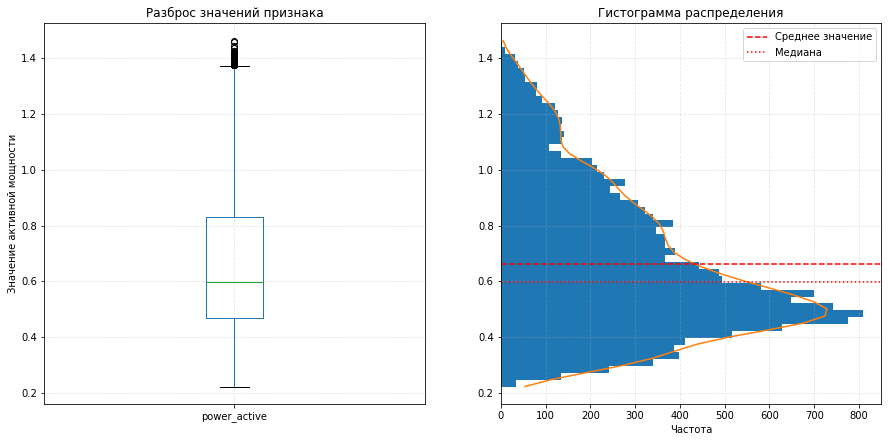

Описательная информация для признака 'power_active':
Минимальное значение: 0.22 	|	Максимальное значение: 1.46
Среднее значение: 0.66
Медиана: 0.6
Межквартильный размах IQR: 0.36
Границы нормальных значений: от 0.22 до 1.37


In [17]:
stat_num(data_arc, 'power_active')

**Вывод**:
* Распределение признака близко к нормальному.
* Наблюдается смещение значений к нижней области с пиковой частотой в районе 0.5.
* Присутствуют данные выходящие за верхнюю границу нормальных значений (1.37), но это не является аномалией.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

##### Признак 'power_reactive'
Отобразим распределение признака:

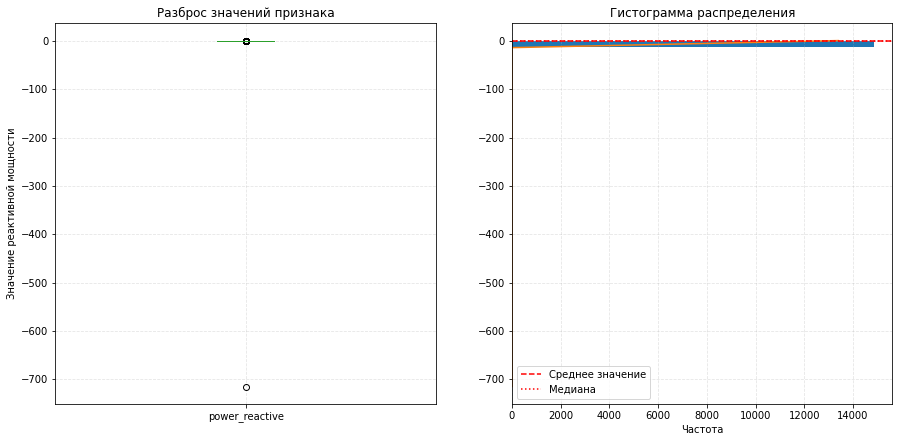

Описательная информация для признака 'power_reactive':
Минимальное значение: -715.48 	|	Максимальное значение: 1.27
Среднее значение: 0.44
Медиана: 0.44
Межквартильный размах IQR: 0.27
Границы нормальных значений: от -0.07 до 1.01


In [18]:
stat_num(data_arc, 'power_reactive')

В данных наблюдается явно аномальное значение реактивной мощности со значением -715.48. Значение выделяется как знаком - видно, что основная масса значений положительна (<span style="border-bottom: 1px dotted; padding-bottom: 2px;"><i>нужно учитывать, что само по себе отрицательное значение для реактивной мощности не является аномалией></i></span>), так и масштабом. 

Рассмотрим это значение более подробно:

In [19]:
# отображение строки с аномальным значением reactive_power:
data_arc[data_arc['power_reactive'] == data_arc['power_reactive'].min()]

,key,arc_time_start,arc_time_end,power_active,power_reactive
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.71,-715.48


Аномальное значение встречается в партии 2116. Рассмотрим эту партию:

In [20]:
data_arc[data_arc['key'] == 2116]

,key,arc_time_start,arc_time_end,power_active,power_reactive
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.79,0.69
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.58,0.41
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.71,-715.48
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.56,0.41


Попробую исправить данные предположив, что значение указано в <ins>тысячекратно увеличенных единицах с отрицательным знаком</ins>:

In [21]:
# коррекция значения:
data_arc.loc[9780, 'power_reactive'] = abs(data_arc.loc[9780, 'power_reactive']) / 1000

# отображение значений для партии 2116
data_arc[data_arc['key'] == 2116]

,key,arc_time_start,arc_time_end,power_active,power_reactive
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.79,0.69
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.58,0.41
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.71,0.72
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.56,0.41


Еще раз отобразим распределение признака:

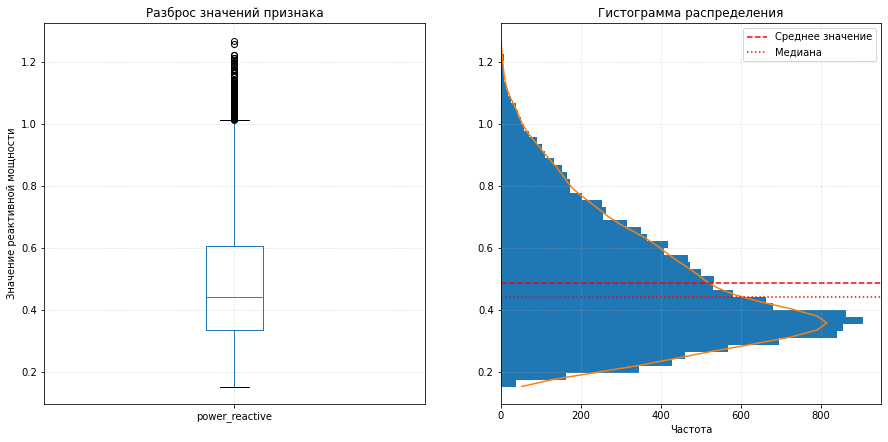

Описательная информация для признака 'power_reactive':
Минимальное значение: 0.15 	|	Максимальное значение: 1.27
Среднее значение: 0.49
Медиана: 0.44
Межквартильный размах IQR: 0.27
Границы нормальных значений: от 0.15 до 1.01


In [22]:
stat_num(data_arc, 'power_reactive')

**Вывод**:
* Распределение признака близко к нормальному.
* Наблюдается смещение значений к нижней области с пиковой частотой в районе 0.4.
* Произведена коррекция одного явно аномального значения: `-715.48` -> `0.71548`
* Других аномальных значений не наблюдается.
* Присутствуют данные выходящие за верхнюю границу нормальных значений (1.01), но это не является аномалией.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_bulk'

#### Обработка дубликатов
Проверим не содержатся ли в данных дубликаты. Для начала проверим - нет ли дубликатов в признаке `key`:

In [23]:
data_bulk.duplicated(subset=['key']).sum()

0

**Вывод**: признак `key` содержит только уникальные значения партий, следовательно дубликаты данных отсутствуют.

#### Обработка пропусков
<a id="232"></a>
Отобразим количество пропусков:

In [24]:
data_bulk.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

Признак `bulk_x` содержит информацию об объеме сыпучих материалов предназначенных для легирования стали в процессе обработки. Исходя из описания технологического процесса, объем и список добавляемых материалов зависит от конкретного химического состава стали в партии. 

Опираясь на информацию предоставленную заказчиком, пропуски данных в признаке `bulk_x` следует интерпретировать как "указанный сыпучий материал не добавлялся". Иными словами пропуски можно заполнить нулями:

In [25]:
# заполнение пропусков 0:
data_bulk.fillna(0, inplace=True)

# вывод количества пропусков:
data_bulk.isna().sum()

key        0
bulk_1     0
bulk_2     0
bulk_3     0
bulk_4     0
bulk_5     0
bulk_6     0
bulk_7     0
bulk_8     0
bulk_9     0
bulk_10    0
bulk_11    0
bulk_12    0
bulk_13    0
bulk_14    0
bulk_15    0
dtype: int64

**Вывод**: для датасета `data_bulk` имеющиеся пропуски заполнены значением `0`.

<a href="#point0">Вернуться к оглавлению</a>

#### Анализ распределения признаков
Датасет `data_arc` содержит следующие признаки: `key`, `bulk_1` ... `bulk_15`. Признак `key` содержит информацию о номере партии и включает:

In [26]:
print('Уникальных значений:', len(data_bulk['key'].unique()))

Уникальных значений: 3129


##### Признаки 'bulk_x'
Отобразим распределение признаков с помощью гистрограмм:

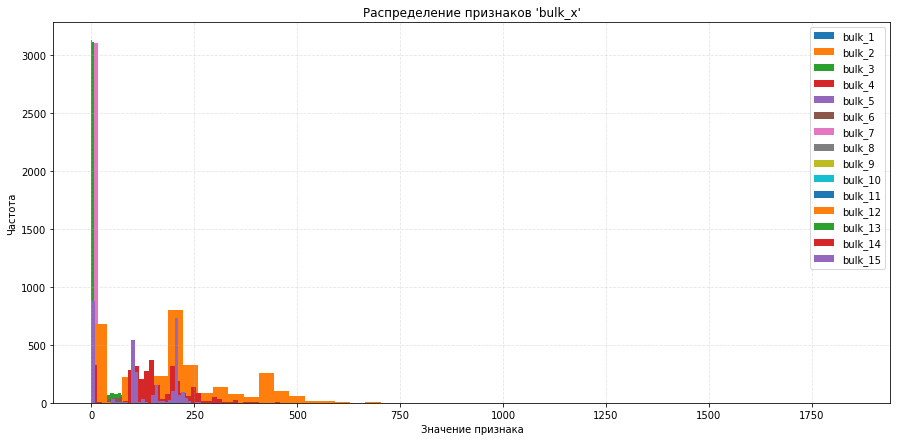

In [27]:
for col in data_bulk.filter(like='bulk_').columns:
    data_bulk[col].hist(bins=50, label=col)

plt.title("Распределение признаков 'bulk_x'")
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.legend()
plt.show()

На гистограмме заметно, что для рассматриваемых признаков значения сосредоточены в диапазоне от 0 до 750 единиц. Однако, встречаются значения превышающие 1750. Наглядно рассмотреть такие значения можно с помощью диаграмм размаха:

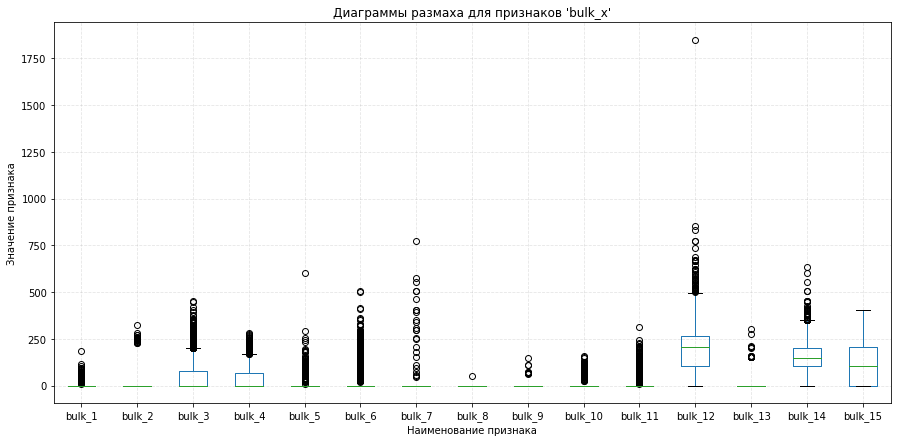

In [28]:
data_bulk.filter(like='bulk_').boxplot()
plt.title("Диаграммы размаха для признаков 'bulk_x'")
plt.xlabel('Наименование признака')
plt.ylabel('Значение признака')
plt.show()

Для признака `bulk_12` заметно явно выделяющееся значение за границей 1750. Проверим:

In [29]:
data_bulk[data_bulk['bulk_12'] > 1000]

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
303,322,185.00,0.00,101.00,58.00,0.00,0.00,406.00,0.00,0.00,0.00,0.00,1849.00,0.00,636.00,0.00


Лишь в одной партии (322) значение признака `bulk_12` составляет необычно большое значение `1849.00`. Тем не менее, учитывая описание технологического процесса, а также информацию предоставленную заказчиком - нет четких оснований считать это значение явно аномальным. Решаю оставить как есть.

Для того, чтобы лучше оценить характер распределения данных, отображу диаграммы размаха признаков без учета значения `1849.00`:

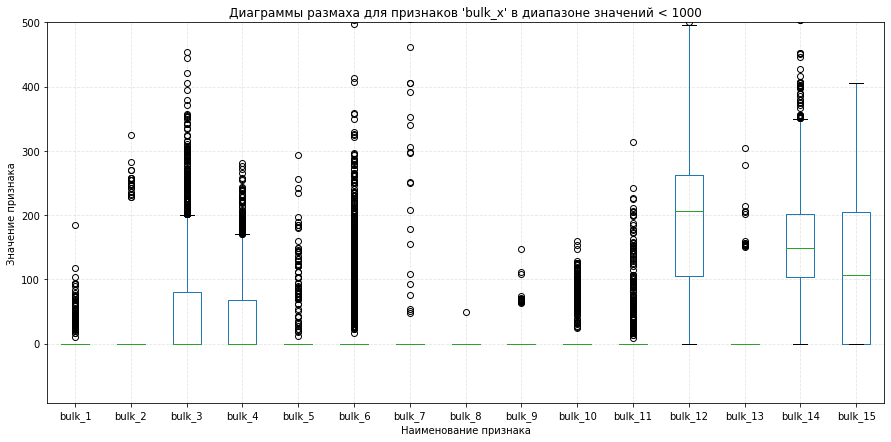

In [30]:
data_bulk.filter(like='bulk_').boxplot()
plt.title("Диаграммы размаха для признаков 'bulk_x' в диапазоне значений < 1000")
plt.xlabel('Наименование признака')
plt.ylabel('Значение признака')
plt.ylim(top=500)
plt.show()

Отобразим количество уникальных значений признака для `bulk_x`:

In [31]:
pd.DataFrame({
    'Количество уникальных значений': 
    [len(data_bulk[i].unique()) for i in data_bulk.filter(like='bulk_').columns]}, 
    index=data_bulk.filter(like='bulk_').columns)

,Количество уникальных значений
bulk_1,48
bulk_2,16
bulk_3,279
bulk_4,207
bulk_5,56
bulk_6,206
bulk_7,26
bulk_8,2
bulk_9,11
bulk_10,78


In [32]:
data_bulk['bulk_8'].value_counts()

0.00     3128
49.00       1
Name: bulk_8, dtype: int64

Признак `bulk_8` содержит всего 2 уникальных значения 0 и 49. Стоит обратить на это внимание.

Интересно изучить как распределены средние и суммарные значения признака `bulk_` (шкала значений признака - <font color='orange'>логарифмическая</font>):

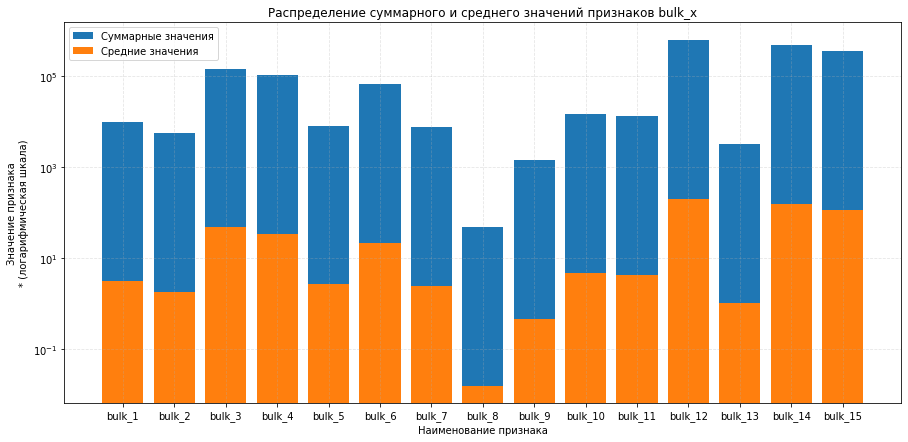

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
mean,3.16,1.78,47.24,33.83,2.63,21.89,2.44,0.02,0.46,4.68,4.35,203.95,1.04,152.71,115.32
sum,9889.00,5567.00,147815.00,105856.00,8241.00,68501.00,7640.00,49.00,1450.00,14658.00,13597.00,638154.00,3260.00,477819.00,360834.00


In [33]:
features_mean_sum(data_bulk)

Также полезно проверить, что <abbr title="значение объема ниже 0 было бы аномальным">все представленные значения ≥ 0</abbr>:

In [34]:
(data_bulk.filter(like='bulk_') < 0).sum()

bulk_1     0
bulk_2     0
bulk_3     0
bulk_4     0
bulk_5     0
bulk_6     0
bulk_7     0
bulk_8     0
bulk_9     0
bulk_10    0
bulk_11    0
bulk_12    0
bulk_13    0
bulk_14    0
bulk_15    0
dtype: int64

**Вывод**:
* Распределение признаков `bulk_x` (объем подаваемого сыпучего материала) довольно различно по масштабу.
* Признаки `bulk_3`, `bulk_4`, `bulk_12`, `bulk_14`, `bulk_15` имеют границы нормальных значений в сотни единиц, остальные признаки имеют меньший масштаб - в десятки, единицы, доли единиц.
* Наиболее масштабный признак среди рассматриваемых - `bulk_12`. Он выделяется как по среднему (203.95) и по суммарному значениям, а также по верхней границе нормальных значений.
* Наименее масштабный признак - `bulk_8`. Среднее значение - сотые доли единиц (0.02).
* Присутствуют одно значение явно выделяющееся на фоне осальных - это значение равное `1849.00` признака `bulk_12`. Тем не менее, учитывая описание технологического процесса, а также информацию предоставленную заказчиком - нет четких оснований считать это значение явно аномальным.
* Других аномальных значений не наблюдается.
* Признак `bulk_8` содержит всего 2 уникальных значения 0 и 49. Стоит обратить на это внимание.
* Не смотря на разный масштаб признаков - будет преждевременно считать, что они оказывают пропорциональное влияние на температуру сплава, так как у нас нет никакой информации о наименовании этих признаков.
* Значения признаков `bulk_x` не содержат отрицтельных значений.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_bulk_time'
Отобразим первые 5 строк датасета:

In [35]:
data_bulk_time.head()

,key,bulk_1_time,bulk_2_time,bulk_3_time,bulk_4_time,bulk_5_time,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


Признак `data_bulk_time` отображает время подачи сыпучих материалов.

Исходя из описания технологического процесса, а также информации предоставленной заказчиком, <ins>время подачи  материалов</ins> не является значимым признаком - решается задача регрессии, а не временных рядов - поэтому признак неинформативен. 

Не будем подробно рассматривать информацию представленную в данном датасете.

**Вывод**: датасет `data_bulk_time` содержит информацию о времени подачи сыпучих материалов. Данная информация неинформативна в контексте поставленной задачи.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_gas'

#### Обработка дубликатов
Проверим не содержатся ли в данных дубликаты. Проверим, есть ли дубли в признаке `key`:

In [36]:
data_gas.duplicated(subset=['key']).sum()

0

**Вывод**: дубликаты данных отсутствуют.

#### Обработка пропусков
Отобразим количество пропусков:

In [37]:
data_gas.isna().sum().sum()

0

**Вывод**: пропуски данных отсутствуют.

<a href="#point0">Вернуться к оглавлению</a>

#### Анализ распределения признаков
Датасет `data_gas` содержит следующие признаки: `key` и `gas`. Признак `key` содержит информацию о номере партии и включает:

In [38]:
print('Уникальных значений:', len(data_gas['key'].unique()))

Уникальных значений: 3239


##### Признак 'gas'
Отобразим распределение признака:

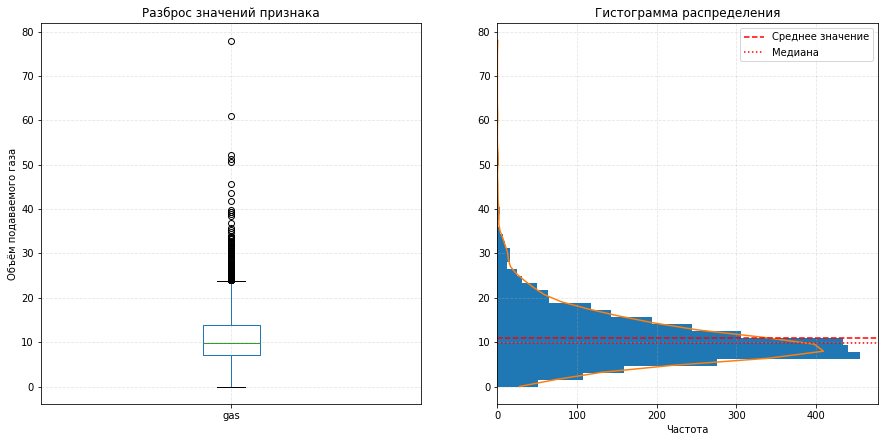

Описательная информация для признака 'gas':
Минимальное значение: 0.01 	|	Максимальное значение: 78.0
Среднее значение: 11.0
Медиана: 9.84
Межквартильный размах IQR: 6.73
Границы нормальных значений: от 0.01 до 23.86


In [39]:
stat_num(data_gas, 'gas')

**Вывод**:
* Распределение признака близко к нормальному.
* Распределение признака достаточно близко к симметричному - при границе нормальных значений от 0.01 до 23.86, среднее значение (11.0) и медиана (9.84) не сильно различаются.
* Присутствуют данные выходящие за верхнюю границу нормальных значений, но это не является аномалией.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_temp'

#### Обработка дубликатов
Проверим не содержатся ли в данных дубликаты. На наличие дубля укажет совпадение данных по двум признакам: `key`, `temp_time`:

In [40]:
data_temp.duplicated(subset=['key', 'temp_time']).sum()

0

**Вывод**: дубликаты данных отсутствуют.

<a href="#point0">Вернуться к оглавлению</a>

#### Обработка пропусков
Отобразим количество пропусков:

In [41]:
data_temp.isna().sum()

key             0
temp_time       0
temp         3427
dtype: int64

⚠️ Признак `temp` <font color='red'>содержит пропуски</font>. 

Отобразим несколько строк датасета:

In [42]:
data_temp.head(10)

,key,temp_time,temp
0,1,2019-05-03 11:02:04,1571.00
1,1,2019-05-03 11:07:18,1604.00
2,1,2019-05-03 11:11:34,1618.00
3,1,2019-05-03 11:18:04,1601.00
4,1,2019-05-03 11:25:59,1606.00
5,1,2019-05-03 11:30:38,1613.00
6,2,2019-05-03 11:34:04,1581.00
7,2,2019-05-03 11:38:40,1577.00
8,2,2019-05-03 11:46:09,1589.00
9,2,2019-05-03 11:49:38,1604.00


Признак `temp_time` отображает значение температуры сплава в течение технологического процесса. Для каждой партии, как можно заметить, отображается несколько значений температуры. Температура замеряется в начале процесса, далее возможны несколько промежуточных замеров и в конце - замер температуры для финального состояния сплава.

Поскольку объектом моделирования является состояние сплава в ковше, для решения задачи прогноза температуры следует рассматривать темперературу в начале процесса (как обучающий признак) и темперературу в конце процесса (как целевой признак). Промежуточные значения не стоит рассматривать, поскольку решается задача регрессии, а не временных рядов. Следовательно нас интересуют пропуски только для начальной и конечной температур, а пропуски в промежуточных замерах - не критичны.

Ввиду указанных особенностей, на данном этапе не будем производить обработку пропусков признака `temp` - осуществим это на этапе создания новых признаков.

**Вывод**: 
* Признак `temp` содержит пропуски данных. 
* Обработка пропусков будет осуществлена на <a href="#Датасет-'data_temp'">этапе создания новых признаков</a>.

<a href="#point0">Вернуться к оглавлению</a>

#### Анализ распределения признаков
Датасет `data_temp` содержит следующие признаки: `key`, `temp_time` и `temp`. Признак `key` содержит информацию о номере партии и включает:

In [43]:
print('Уникальных значений:', len(data_temp['key'].unique()))

Уникальных значений: 3216


Признак `temp_time` сам по себе не несет информации. На основе значений данного признака будут сформированы новые признаки - начальная и конечная температура сплава. На данном этапе не будем отдельно рассматривать признак `temp_time`.

##### Признак 'temp'
Отобразим распределение признака:

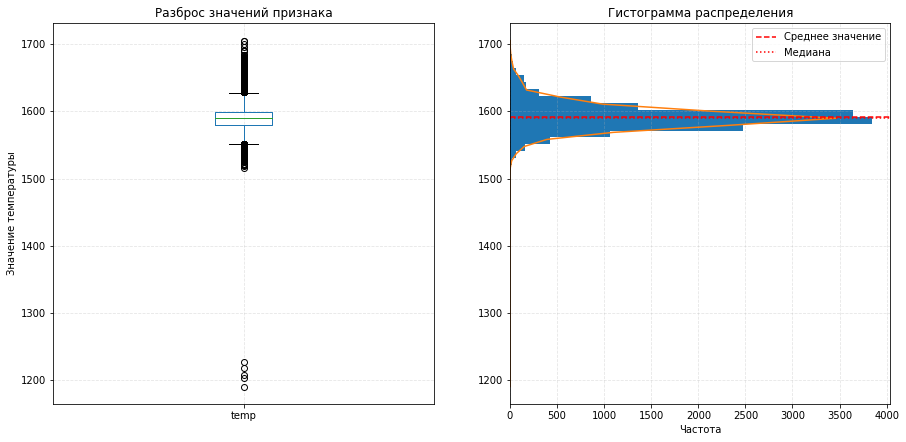

Описательная информация для признака 'temp':
Минимальное значение: 1191.0 	|	Максимальное значение: 1705.0
Среднее значение: 1590.72
Медиана: 1590.0
Межквартильный размах IQR: 19.0
Границы нормальных значений: от 1551.5 до 1627.5


In [44]:
stat_num(pd.DataFrame(data_temp['temp']).dropna(), 'temp')

<a id="temp_anomal"></a>
На диаграмме размаха заметны значения температуры сплава значительно ниже температуры плавления (1400 °C).  
Отобразим такие значения:

In [45]:
# определение значений key, у которых temp меньше порога:
temp_anomal_idx = data_temp[data_temp['temp'] < MELTING_THRESHOLD]['key'].values

# отображение всех значений партий с аномальной температурой:
(data_temp.query('key in @temp_anomal_idx')
 .style.applymap(lambda x: 'background-color: #f4cccc' if x < MELTING_THRESHOLD else '', subset=['temp'])
 .set_caption(f"Кол-во 'temp' < {MELTING_THRESHOLD}: {data_temp[data_temp['temp'] < MELTING_THRESHOLD].shape[0]}")
)

,key,temp_time,temp
4883,867,2019-06-06 08:03:39,1191.000000
4884,867,2019-06-06 08:18:52,1575.000000
4885,867,2019-06-06 08:22:38,1576.000000
4886,867,2019-06-06 08:25:11,1571.000000
4887,867,2019-06-06 08:29:49,1600.000000
4888,867,2019-06-06 08:36:49,1522.000000
4889,867,2019-06-06 08:43:02,1521.000000
4890,867,2019-06-06 08:48:23,1599.000000
6784,1214,2019-06-18 08:01:03,1208.000000
6785,1214,2019-06-18 08:17:56,1608.000000


Имеется 5 значений признака `temp` меньше 1400 °C. Как видно, в каждом случае аномальное значение зафиксировано для *начальной* температуры. Согласно условиям технологического процесса такие значения являются **явно аномальными** и их следует исключить - осуществим фильтрацию данных на <a href="#Датасет-'data_temp'">этапе создания новых признаков</a>.

Еще раз отобразим распределение признака отфильтровав значения выше 1400 °C:

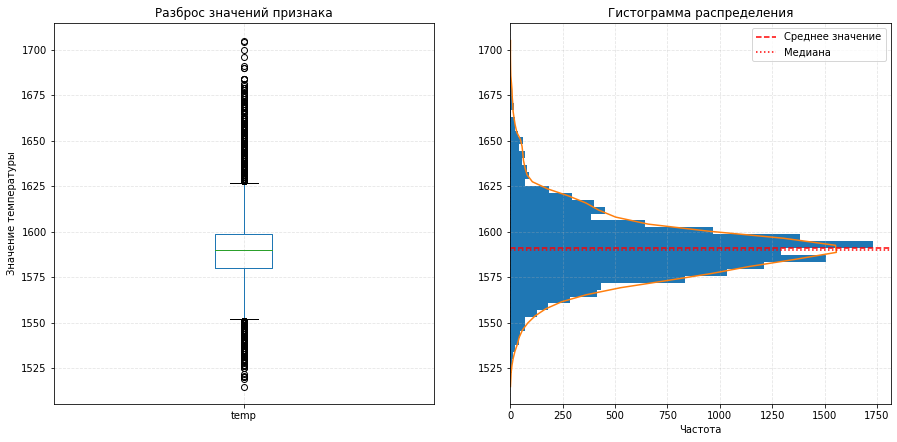

Описательная информация для признака 'temp':
Минимальное значение: 1515.0 	|	Максимальное значение: 1705.0
Среднее значение: 1590.85
Медиана: 1590.0
Межквартильный размах IQR: 19.0
Границы нормальных значений: от 1551.5 до 1627.5


In [46]:
stat_num(data_temp[data_temp['temp'] > MELTING_THRESHOLD], 'temp')

**Вывод**:
* В целом, наблюдается нормальное распределение признака `temp`.
* Значения признака распределены достаточно симметрично относительно среднего значения 1590, которое также совпадает с медианой.
* Присутствуют данные выходящие за границы нормальных значений:
  1. Заметны группы данных близко к верхней (1627) и нижней (1551) границе нормальных значений. Согласно условиям технологического процесса эти данные **не являются аномальными**.
  2. Заметна отдельная группа значений значительно ниже температуры плавления (1400 °C):
    * Всего таких значений 5.
    * В каждом случае низкое значение зафиксировано для *начальной* температуры.
    * Согласно условиям технологического процесса, значения температуры ниже 1400 °C **являются аномальными**.
    * Обработка данных значений будет осуществлена на <a href="#Датасет-'data_temp'">этапе создания новых признаков</a>.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_wire'

#### Обработка дубликатов
Проверим не содержатся ли в данных дубликаты. Для начала проверим - нет ли дубликатов в признаке `key`:

In [47]:
data_wire.duplicated(subset=['key']).sum()

0

**Вывод**: признак `key` содержит только уникальные значения партий, следовательно дубликаты данных отсутствуют.

#### Обработка пропусков
<a id="232"></a>
Отобразим количество пропусков:

In [48]:
data_wire.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

Признак `wire_x` содержит информацию об объеме *проволочных* материалов предназначенных для легирования стали в процессе обработки. Исходя из описания технологического процесса, объем и список добавляемых материалов зависят от конкретного химического состава стали в партии. 

Опираясь на информацию предоставленную заказчиком, пропуски данных в признаке `wire_x` следует интерпретировать как "указанный проволочный материал не добавлялся". Иными словами пропуски можно заполнить нулями:

In [49]:
# заполнение пропусков 0:
data_wire.fillna(0, inplace=True)

# вывод количества пропусков:
data_wire.isna().sum()

key       0
wire_1    0
wire_2    0
wire_3    0
wire_4    0
wire_5    0
wire_6    0
wire_7    0
wire_8    0
wire_9    0
dtype: int64

**Вывод**: для датасета `data_wire` имеющиеся пропуски заполнены значением `0`.

<a href="#point0">Вернуться к оглавлению</a>

#### Анализ распределения признаков
Датасет `data_wire` содержит следующие признаки: `key`, `wire_1` ... `wire_9`. Признак `key` содержит информацию о номере партии и включает:

In [50]:
print('Уникальных значений:', len(data_wire['key'].unique()))

Уникальных значений: 3081


##### Признаки 'wire_x'
Отобразим распределение признаков с помощью гистрограмм:

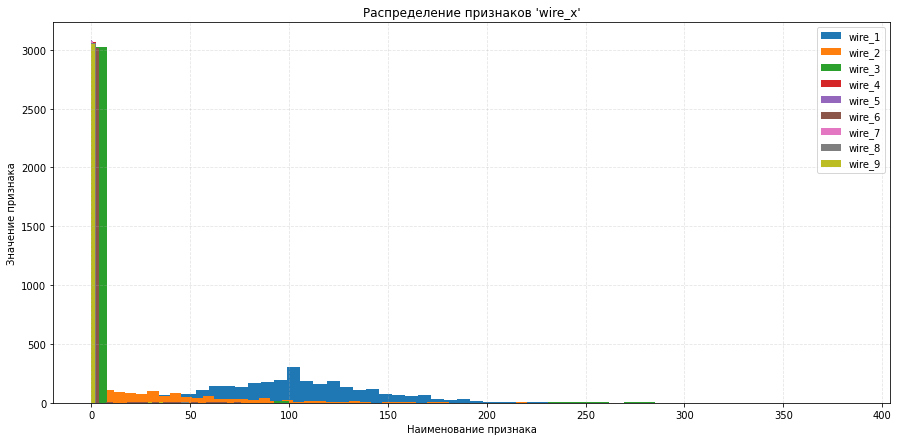

In [51]:
for col in data_wire.filter(like='wire_').columns:
    data_wire[col].hist(bins=50, label=col)

plt.title("Распределение признаков 'wire_x'")
plt.xlabel('Наименование признака')
plt.ylabel('Значение признака')
plt.legend()
plt.show()

На гистограммах заметно два характерных типа распределения признаков:
1. Значения признаков `wire_1` и `wire_2` имеют заметный диапазон распределения начинающий от 0 стремящийся к значениям 150-200 единиц.
2. Значения остальных семи признаков сосредоточены в околонулевом диапазоне.

Более наглядно рассмотреть значения можно с помощью диаграмм размаха:

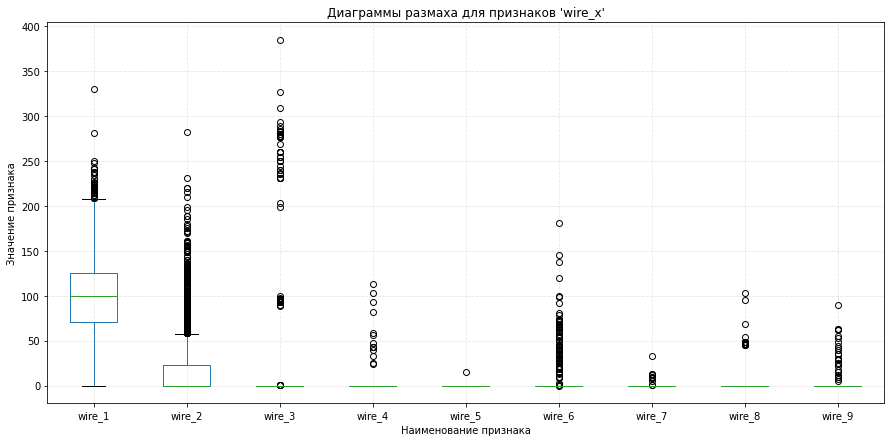

In [52]:
data_wire.filter(like='wire_').boxplot()
plt.title("Диаграммы размаха для признаков 'wire_x'")
plt.xlabel('Наименование признака')
plt.ylabel('Значение признака')
plt.show()

На диаграммах размаха также видно, значения признаков `wire_1` и `wire_2` имеют заметный диапазон распределения.

Рассмотрим отдельно группу признаков `wire_3` ... `wire_9`:

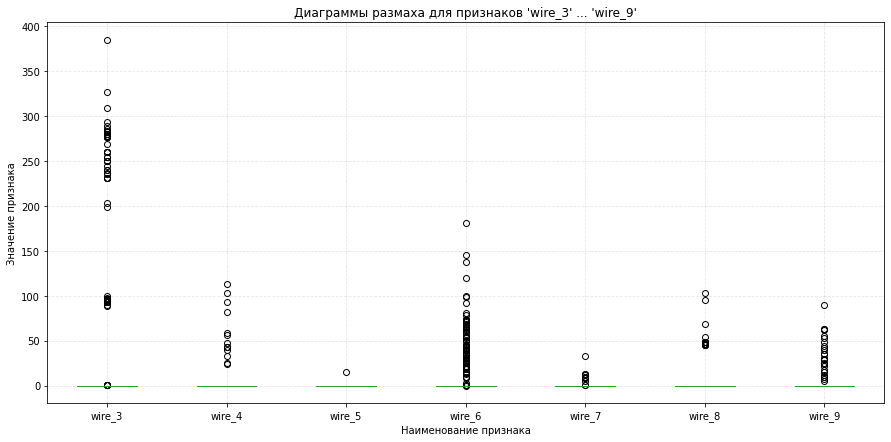

In [53]:
data_wire[data_wire.filter(like='wire_').columns[2:]].boxplot()
plt.title("Диаграммы размаха для признаков 'wire_3' ... 'wire_9'")
plt.xlabel('Наименование признака')
plt.ylabel('Значение признака')
plt.show()

Визуально картина распределения не изменилась.

Отобразим количество уникальных значений для `wire_x`:

In [54]:
pd.DataFrame({
    'Количество уникальных значений': 
    [len(data_wire[i].unique()) for i in data_wire.filter(like='wire_').columns]}, 
    index=data_wire.filter(like='wire_').columns)

,Количество уникальных значений
wire_1,2252
wire_2,714
wire_3,57
wire_4,15
wire_5,2
wire_6,70
wire_7,11
wire_8,14
wire_9,26


In [55]:
data_wire['wire_5'].value_counts()

0.00     3080
15.13       1
Name: wire_5, dtype: int64

Признак `wire_5` имеет всего два уникальных значения 0 и 15.13. Стоит обратить на это внимание.

Интересно изучить как распределены средние и суммарные значения признака `bulk` (шкала значений признака - <font color='orange'>логарифмическая</font>):

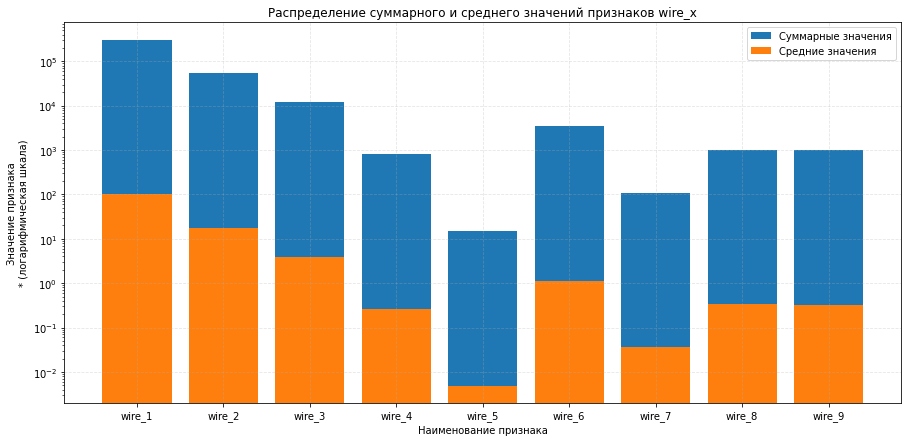

,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
mean,100.04,17.71,3.87,0.26,0.00,1.14,0.04,0.33,0.32
sum,308236.83,54572.93,11937.41,804.20,15.13,3505.24,110.43,1018.88,990.52


In [56]:
features_mean_sum(data_wire)

Также полезно проверить, что все представленные значения ≥ 0:

In [57]:
(data_wire.filter(like='wire_') < 0).sum()

wire_1    0
wire_2    0
wire_3    0
wire_4    0
wire_5    0
wire_6    0
wire_7    0
wire_8    0
wire_9    0
dtype: int64

**Вывод**:
* Распределение признаков `wire_x` (объем подаваемого проволочного материала) довольно различно по масштабу:
  * Значения признаков `wire_1` и `wire_2` имеют заметный диапазон распределения начинающий от 0 стремящийся к значениям 150-200 единиц.
  * Значения остальных семи признаков сконцентрированы в околонулевом диапазоне.
* Наиболее масштабный признак среди рассматриваемых - `wire_1`. Он выделяется как по среднему (100.04) и по суммарному значениям, а также по верхней границе нормальных значений.
* Наименее масштабный признак - `wire_5`. Среднее значение признака: 0.004911.
* Явно аномальных значений признаков не наблюдается.
* Признак `wire_5` имеет всего два уникальных значения 0 и 15.13. Стоит обратить на это внимание.
* Не смотря на разный масштаб признаков - будет преждевременно считать, что они оказывают пропорциональное влияние на температуру сплава, так как у нас нет никакой информации о наименовании этих признаков.
* Все представленные признаки имеют значения больше или равные 0.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ датасета 'data_wire_time'
Отобразим первые 5 строк датасета:

In [58]:
data_wire_time.head()

,key,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Признак `data_wire_time` отображает время подачи проволочных материалов.

Исходя из описания технологического процесса, а также информации предоставленной заказчиком, <ins>время подачи  материалов</ins> не является значимым признаком - решается задача регрессии, а не временных рядов - поэтому признак неинформативен. 

Не будем подробно рассматривать информацию представленную в данном датасете.

**Вывод**: датасет `data_wire_time` содержит информацию о времени подачи проволочных материалов. Данная информация неинформативна в контексте поставленной задачи.

**Общий вывод по подразделу**:
* Произведены анализ и предобработка данных для  каждого представленного датасета: `data_arc`, `data_bulk`, `data_bulk_time`, `data_gas`, `data_temp`, `data_wire`, `data_wire_time`.
* Заголовки датасетов преобразованы в соответствии со стандартом оформления данных.
* Выбраны датасеты, на основе которых будут сформированы обучающие признаки:

Датасет|Описание
-|:-
`data_arc`|Содержит данные об электродах
`data_bulk`|Содержит данные о подаче сыпучих материалов (объём)
`data_gas`|Содержит данные о продувке сплава газом
`data_temp`|Содержит результаты измерения температуры
`data_wire`|Содержит данные о проволочных материалах (объём)

* Датасеты `data_bulk_time` и `data_wire_time` содержат информацию о времени конкретной операции и, в контексте поставленной задачи, неинформативны.
* Для датасетов `data_bulk` и `data_wire` пропуски заполнены значениями 0.
* Пропуски в датасете `data_temp` оставлены для устранения на <a href="#Датасет-'data_temp'">этапе создания новых признаков</a>.
* Датасеты `data_arc` и `data_gas` не содержат пропусков.

<a href="#point0">Вернуться к оглавлению</a>

## Создание новых признаков
Для решения поставленной задачи - предсказания температуры сплава - нам предоставлен набор датасетов с различной информацией. Кроме того, каждый отдельный датасет имеет разную структуру данных, например в датасетах `data_arc`, `data_gas`, `data_temp` зафиксровано несколько замеров параметров для одной партии, а в датасетах `data_bulk` и `data_wire` - ну одну партию имеется один замер параметров.

Для обучения модели нам необходимо подготовить набор признаков предварительно агрегировав данные внутри каждого датасета таким образом, чтобы на каждое значение номера партии (`key`) приходилось одно значение признака. И далее нам нужно соединить все данные в один датасет. 

Способ агрегации данных может быть разным для разных признаков.

### Датасет 'data_arc'
Представлены данные об электродах:

In [59]:
data_arc.head()

,key,arc_time_start,arc_time_end,power_active,power_reactive
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64


На основе имеющихся признаков можно создать следующие:
1. **Полная мощность**. Нам представлены данные об <ins>активной</ins> и <ins>реактивной</ins> мощностях. В контексте поставленной задачи - *уменьшение потребления электроэнергии* на этапе обработки стали <ins>путем повышения точности контроля температуры сплава</ins> - будет правильней использовать полную мощность, которая определяется по формуле:  
$S = \sqrt{P^2+Q^2}$, где $S$ - полная мощность, $P$ и $Q$ - активная и реактивная мощности соответственно.
2. **Коэффициент мощности**. Определяется как отношение активной и полной мощностей, показывает насколько эффективно используется электроэнергия. Определяется по формуле: $\cos \phi = \frac{P}{S} = \frac{P}{\sqrt{P^2 + Q^2}}$
3. **Отношение реактивной мощности к активной**. Параметр показывает баланс между реактивной и активной мощностями: $\frac{Q}{P}$.
4. **Продолжительность нагрева**. Как уже упоминалось, время в календарном плане для задачи неинформативно. Но поскольку в данных есть время <ins>начала</ins> и <ins>конца</ins> операции - можно рассчитать длительность операции для каждой итерации, а затем просуммировать значения в рамках каждой партии. Нет уверенности, что этот признак имеет влияение на целевой признак, но попробуем максимально использовать предоставленную информацию.
5. **Полная энергия**. Используется для оценки общей нагрузки на систему, определяется по формуле: $E = S*\Delta t$

Для каждой партии есть несколько замеров параметров. Для их агрегации можно поступить следующим образом:  
1. Для каждой итерации рассчитать значение признака,  
2. Просуммировать значения признака для всех итераций в рамках одной партии.

Для начала рассчитаем новые признаки `power_full`, `heat_duration`, `energy_full`:

In [60]:
# полная мощность:
data_arc['power_full'] = (data_arc['power_active']**2 + data_arc['power_reactive']**2)**0.5

# длительность [секунд]:
data_arc['heat_duration'] = (pd.to_datetime(data_arc['arc_time_end']) -
                             pd.to_datetime(data_arc['arc_time_start'])).dt.total_seconds()

# полная энергия:
data_arc['energy_full'] = data_arc['power_full'] * data_arc['heat_duration']

# вывод результата:
data_arc.head(10)

,key,arc_time_start,arc_time_end,power_active,power_reactive,power_full,heat_duration,energy_full
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21,0.37,228.00,84.62
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48,0.90,185.00,166.93
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43,0.72,172.00,124.28
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38,0.64,365.00,234.63
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64,1.08,148.00,159.83
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.38,0.22,0.44,137.00,60.31
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.26,0.21,0.33,338.00,112.46
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.71,0.48,0.86,126.00,108.37
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.79,0.54,0.96,210.00,200.62
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.10,0.82,1.37,280.00,384.68


Убедимся, что активная и реактивная мощность коррелиют с полной мощностью и таким образом мы не теряем информацию о характере распределения:

In [61]:
data_arc[['power_active', 'power_reactive', 'power_full']].corr()

,power_active,power_reactive,power_full
power_active,1.00,0.97,1.00
power_reactive,0.97,1.00,0.99
power_full,1.00,0.99,1.00


Активная и реактивная мощности имеют ~100% положительную корреляцию с полной мощностью, таким образом мы убедились, что полная мощность объективно отражает представленные признаки. 

Теперь сгруппируем данные по значениям признака `key` и занесем результат в новый датафрейм:

In [62]:
data_arc_new = data_arc.groupby('key')[['power_active', 'power_reactive', 'power_full', 
                                        'heat_duration', 'energy_full']].sum()
# вывод результата:
data_arc_new.head()

,power_active,power_reactive,power_full,heat_duration,energy_full
key,,,,,
1,3.04,2.14,3.72,1098.00,770.28
2,2.14,1.45,2.59,811.00,481.76
3,4.06,2.94,5.02,655.00,722.84
4,2.71,2.06,3.40,741.00,683.46
5,2.25,1.69,2.82,869.00,512.17


На основе значений агрегированных признаков рассчитаем коэффициент мощности и отношение мощностей. Вычисление признаков производится на данном этапе, поскольку нам важно учесть соотношение значений суммарных параметров, а не значения на каждой итерации:

In [63]:
# коэффициент мощности:
data_arc_new['cos_phi'] = data_arc_new['power_active'] / data_arc_new['power_full']

# отношение реактивной мощности к активной:
data_arc_new['power_ratio'] = data_arc_new['power_reactive'] / data_arc_new['power_active']

# удаление ненужных признаков:
data_arc_new.drop(['power_active', 'power_reactive'], axis=1, inplace=True)

# вывод результата:
data_arc_new.head()

,power_full,heat_duration,energy_full,cos_phi,power_ratio
key,,,,,
1,3.72,1098.00,770.28,0.82,0.71
2,2.59,811.00,481.76,0.83,0.68
3,5.02,655.00,722.84,0.81,0.72
4,3.40,741.00,683.46,0.80,0.76
5,2.82,869.00,512.17,0.80,0.75


**Вывод**:
* Для датасета `data_arc` созданы новые признаки отражающие информацию об электродах для каждой отдельной партии:
  1. Полная мощность `power_full`, определяемая по формуле $S = \sqrt{P^2+Q^2}$, и равная сумме значений мощности отдельных итераций для каждой рассматриваемой партии.
  2. Длительность операции нагрева (в секундах) `heat_duration`.
  3. Полная энергия `energy_full`.
  4. Коэффициент мощности `cos_phi`.
  5. Отношение реактивной мощности к активной `power_ratio`.
* Созданные признаки занесены в датасет `data_arc_new`

<a href="#point0">Вернуться к оглавлению</a>

### Датасет 'data_bulk'
Представлены данные о подаче сыпучих материалов (объём):

In [64]:
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00
1,2,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00
2,3,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00
3,4,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00
4,5,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00


Для датасета `data_bulk` для каждого уникального значения `key` представлено одно значение признака.

По информации от заказчика нам известно, что каждый признак `bulk_x` обозначает разный тип материала. О наименовании и свойствах данных материалов информации не имеется. Введем новый признак, отражающий суммарный объем добавленных материалов:

In [65]:
# создание нового датафрейма с установкой key в качестве индексов:
data_bulk_new = data_bulk.set_index('key')

# добавление признака с суммарным объемом материалов:
data_bulk_new['bulk_sum'] = data_bulk_new.sum(axis=1)

# вывод результата:
data_bulk_new.head()

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,bulk_sum
key,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00,553.00
2,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00,582.00
3,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00,544.00
4,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00,595.00
5,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00,584.00


**Вывод**: 
* Для датасета `data_bulk` добавлен новый признак `bulk_sum` отражающий суммарный объем добавленных материалов
* Созданные признаки занесены в датасет `data_bulk_new`

<a href="#point0">Вернуться к оглавлению</a>

### Датасет 'data_gas'
Содержит данные о продувке сплава газом:

In [66]:
data_gas.head()

,key,gas
0,1,29.75
1,2,12.56
2,3,28.55
3,4,18.84
4,5,5.41


Признак не требует преобразования.

Установим в качестве индексов значения признака `key`:

In [67]:
data_gas.set_index('key', inplace=True)
data_gas.head()

,gas
key,
1,29.75
2,12.56
3,28.55
4,18.84
5,5.41


**Вывод**: 
* для датасета `data_gas` признаки оставлены без изменения
* в качестве индексов установлены значения признака `key`

<a href="#point0">Вернуться к оглавлению</a>

### Датасет 'data_temp'
Содержит данные об измерении температуры:

In [68]:
# вывод значений для 1 и 2 партий:
data_temp[data_temp['key'].isin([1,2])]

,key,temp_time,temp
0,1,2019-05-03 11:02:04,1571.00
1,1,2019-05-03 11:07:18,1604.00
2,1,2019-05-03 11:11:34,1618.00
3,1,2019-05-03 11:18:04,1601.00
4,1,2019-05-03 11:25:59,1606.00
5,1,2019-05-03 11:30:38,1613.00
6,2,2019-05-03 11:34:04,1581.00
7,2,2019-05-03 11:38:40,1577.00
8,2,2019-05-03 11:46:09,1589.00
9,2,2019-05-03 11:49:38,1604.00


Датасет `data_temp` содержит данные об измерении температуры в течение технологического процесса плавки для каждой отдельной партии.

Как можно заметить по выведенным значениям - количество итераций (замеров) для каждой партии может быть разным.

На основе значений признака `temp` необходимо сформировать два новых признака, отображающих <ins>начальную</ins> и <ins>конечную</ins> температуру сплава. Отсюда возникают критерии отбора:
1. Для каждой уникальной партии должно быть <ins>указано минимум два значения температуры</ins>:
  * первое значение - для начальной температуры,
  * последнее - для конечной.
2. Первое и последнее значения температуры для каждой партии <ins>не должны содержать пропусков</ins>.
3. Первое и последнее значения температуры для каждой партии должны быть ≥ 1400 °C. Это <ins>заданный технологический критерий</ins>.

<a id="temp_0"></a>
Проверим какое количество итераций встречается для уникальных значений признака `key`. 

Для этого сгруппируем по `key` и посчитаем количество уникальных значений признака `temp`:

In [69]:
print("Всего уникальных значений признака 'key':", len(data_temp['key'].unique()))
print("\nКоличество партий с указанным числом валидных значений 'temp':")
pd.DataFrame(data_temp.groupby('key')[['temp']].count()).value_counts()

Всего уникальных значений признака 'key': 3216

Количество партий с указанным числом валидных значений 'temp':


temp
1       741
5       688
6       580
4       395
7       388
8       152
3       136
9        66
2        32
10       21
11        7
12        3
13        2
14        2
16        2
17        1
dtype: int64

Нашлось 741 номера партий у которых есть <font color='red'>только одно валидное значение</font> температуры.

Подсчитаем количество уникальных значений `temp_time` и `temp` для каждой партии и выведем несколько таких значений, где количество валидных значений `temp` равно 1:

In [70]:
data_temp.groupby('key')[['temp_time', 'temp']].count().query('temp == 1').head(10)

,temp_time,temp
key,,
195,1,1
279,1,1
2500,5,1
2501,7,1
2502,5,1
2503,5,1
2504,6,1
2505,6,1
2506,8,1


Отобразим значения для некоторых найденных партий:

In [71]:
display(data_temp[data_temp['key'] == 195])
display(data_temp[data_temp['key'] == 2500])
display(data_temp[data_temp['key'] == 2506])

,key,temp_time,temp
1105,195,2019-05-11 00:01:36,1583.00


,key,temp_time,temp
13926,2500,2019-08-10 14:04:39,1539.00
13927,2500,2019-08-10 14:13:11,NaN
13928,2500,2019-08-10 14:18:12,NaN
13929,2500,2019-08-10 14:25:53,NaN
13930,2500,2019-08-10 14:29:39,NaN


,key,temp_time,temp
13960,2506,2019-08-10 19:04:29,1595.00
13961,2506,2019-08-10 19:11:21,NaN
13962,2506,2019-08-10 19:16:28,NaN
13963,2506,2019-08-10 19:22:21,NaN
13964,2506,2019-08-10 19:28:03,NaN
13965,2506,2019-08-10 19:34:04,NaN
13966,2506,2019-08-10 19:37:55,NaN
13967,2506,2019-08-10 19:41:56,NaN


Как видно:
* Есть партии, где всего одна итерация замера температуры.
* Есть партии, где несколько итераций, но в силу каких-то причин, только одно валидное значение температуры.

Мы не можем принять в расчет подобные значения.

Задам вспомогательную функцию для создания новых признаков датасета `data_temp`:

In [72]:
def time_feature_create(df, temp_threshold):
    """
    Функция для формирования признаков 'temp_start', 'temp_final', 'temp_duration'
    на основе значений признаков 'temp_time' и 'temp' датасета 'data_temp'.
    """
    # создание списка для фиксации результата:
    result = []
    
    # цикл перебора уникальных значений признака key:
    for k in df['key'].unique():
        
        # если для значения key указано более 1 значения temp:
        if len(df[df['key'] == k]['temp'].dropna()) > 1:
            
            # / исходим из того, что значения могут быть указаны не по порядку /
            # определение индексов минимальной и максимальной временной метки:
            idx_min = df[df['key'] == k]['temp_time'].astype('datetime64').idxmin()
            idx_max = df[df['key'] == k]['temp_time'].astype('datetime64').idxmax()
            
            # определение начальной и конечной температуры для партии
            # на основе полученных индексов:
            temp_start = df['temp'].loc[idx_min]
            temp_final = df['temp'].loc[idx_max]
            
            # проверка условия что начальная и конечная температуры выше заданного порога:
            if temp_start >= temp_threshold and temp_final >= temp_threshold:
                
                # расчет длительности:
                temp_duration = (pd.to_datetime(df['temp_time'].loc[idx_max]) - 
                                 pd.to_datetime(df['temp_time'].loc[idx_min])).total_seconds()
                
                # добавить результат
                result.append([k, temp_start, temp_final, temp_duration])
            else:
                
                # вывести неудовлетворящие значения:
                print(red + f"key={k}, temp_start={temp_start}, temp_final={temp_final} | ниже порога" + end)
                
    # формирование нового датафрейма:
    df_new = pd.DataFrame(result, columns=['key', 'temp_start', 'temp_final', 'temp_duration'])
    df_new.set_index('key', inplace=True)
    return df_new

Сформируем датасет с новыми признаками:

In [73]:
data_temp_new = time_feature_create(data_temp, temp_threshold=MELTING_THRESHOLD)
display(data_temp_new.head())
print('data_temp_new.shape:', data_temp_new.shape)
temp_txt = '3216 - 741 - 4'
print(temp_txt + ' =', eval(temp_txt))

key=867, temp_start=1191.0, temp_final=1599.0 | ниже порога
key=1214, temp_start=1208.0, temp_final=1591.0 | ниже порога
key=1619, temp_start=1218.0, temp_final=1590.0 | ниже порога
key=2052, temp_start=1227.0, temp_final=1592.0 | ниже порога


,temp_start,temp_final,temp_duration
key,,,
1,1571.00,1613.00,1714.00
2,1581.00,1602.00,1265.00
3,1596.00,1599.00,1753.00
4,1601.00,1625.00,1220.00
5,1576.00,1602.00,1536.00


data_temp_new.shape: (2471, 3)
3216 - 741 - 4 = 2471


**Вывод:**
* На основе данных датасета `data_temp` сформирован новый набор признаков, отображающий результаты измерения температуры сплава во время технологического процесса.
* На основе данных о температуре для каждой партии (признак `temp`) сформированы новые признаки характеризующие начальную и конечную температуру сплава в течение процесса.
* На основе данных о времени замера температуры рассчитана длительность всего процесса.
* Изначально датасет `data_temp` содержал 3216 уникальных значения `key`. 
* <a href="#temp_0">741 значение было отброшено</a> поскольку для них было указано только 1 валидное значение температуры. 
* Еще 4 значения не прошли по условию порога температуры (всего <a href="#temp_anomal">таких значений было 5</a>, из них 1 удалено предыдущим условием). 
* Итого осталось 2471 партий, это около 77% от изначального количества.

<a href="#point0">Вернуться к оглавлению</a>

### Датасет 'data_wire'
Представлены данные о подаче проволочных материалов (объём):

In [74]:
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Для датасета `data_wire` для каждого уникального значения `key` представлено одно значение признака.

По информации от заказчика нам известно, что каждый признак `wire_x` обозначает разный тип проволочного материала. О наименовании и свойствах данных материалов информации не имеется. Введем новый признак, отражающий суммарный объем добавленных проволочных материалов:

In [75]:
# создание нового датафрейма с установкой key в качестве индексов:
data_wire_new = data_wire.set_index('key')

# добавление признака с суммарным объемом материалов:
data_wire_new['wire_sum'] = data_wire_new.sum(axis=1)

# вывод результата:
data_wire_new.head()

,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,wire_sum
key,,,,,,,,,,
1,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.06
2,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96.05
3,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,91.16
4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,89.06
5,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.35


**Вывод**: 
* Для датасета `data_wire` добавлен новый признак `wire_sum` отражающий суммарный объем добавленных материалов
* Созданные признаки занесены в датасет `data_wire_new`

<a href="#point0">Вернуться к оглавлению</a>

## Объединение данных
На предыдущем этапе были созданы новые признаки для некоторых датасетов, а некоторые датасеты были преобразованы для оптимального способа объединения данных.

Данные находятся в датасетах: `data_arc_new`, `data_bulk_new`, `data_gas`, `data_temp_new`, `data_wire_new`.

С помощью вспомогательной функции проверим общее число уникальных значений номеров партий:

In [76]:
df_list = [data_arc_new, data_bulk_new, data_gas, data_temp_new, data_wire_new]
print('Общих значений среди набора датасетов:', len(common_values(df_list)))

Общих значений среди набора датасетов: 2325


На начальном этапе это число составляло 3022, часть данных была отфильтрована на этапе формирования признаков характеризующих температуру сплава.

Проведем объединение имеющихся датасетов:

In [77]:
# Создание нового датасета на основе data_arc_new:
data = data_arc_new.copy()

# Цикл объединения данных:
for df in [data_bulk_new, data_gas, data_temp_new, data_wire_new]:
    data = data.join(df, how='inner')

# вывод основной информации:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   power_full     2325 non-null   float64
 1   heat_duration  2325 non-null   float64
 2   energy_full    2325 non-null   float64
 3   cos_phi        2325 non-null   float64
 4   power_ratio    2325 non-null   float64
 5   bulk_1         2325 non-null   float64
 6   bulk_2         2325 non-null   float64
 7   bulk_3         2325 non-null   float64
 8   bulk_4         2325 non-null   float64
 9   bulk_5         2325 non-null   float64
 10  bulk_6         2325 non-null   float64
 11  bulk_7         2325 non-null   float64
 12  bulk_8         2325 non-null   float64
 13  bulk_9         2325 non-null   float64
 14  bulk_10        2325 non-null   float64
 15  bulk_11        2325 non-null   float64
 16  bulk_12        2325 non-null   float64
 17  bulk_13        2325 non-null   float64
 18  bulk_14 

Как и подсчитано ранее, в новом датасете 2325 строк, а новое количество признаков равно 35.

Отобразим первые 5 строк нового датасета:

In [78]:
# Группа 1:
display(data.loc[:5, ~data.columns.str.contains('bulk_|wire_', regex=True)]
        .style.set_caption('Группа признаков об электродах, газе, температуре:')
        .format('{:.2f}'))

# Группа 2:
display(data.filter(like='bulk_').head()
       .style.set_caption('Группа признаков о подаче сыпучих материалов:')
       .format('{:.2f}'))

# Группа 3:
display(data.filter(like='wire_').head()
       .style.set_caption('Группа признаков о подаче проволочных материалов:')
       .format('{:.2f}'))

,power_full,heat_duration,energy_full,cos_phi,power_ratio,gas,temp_start,temp_final,temp_duration
key,,,,,,,,,
1,3.72,1098.00,770.28,0.82,0.71,29.75,1571.00,1613.00,1714.00
2,2.59,811.00,481.76,0.83,0.68,12.56,1581.00,1602.00,1265.00
3,5.02,655.00,722.84,0.81,0.72,28.55,1596.00,1599.00,1753.00
4,3.40,741.00,683.46,0.80,0.76,18.84,1601.00,1625.00,1220.00
5,2.82,869.00,512.17,0.80,0.75,5.41,1576.00,1602.00,1536.00


,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,bulk_sum
key,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00,553.00
2,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00,582.00
3,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00,544.00
4,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00,595.00
5,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00,584.00


,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,wire_sum
key,,,,,,,,,,
1,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.06
2,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96.05
3,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,91.16
4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,89.06
5,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.35


Проверим, не возникло ли на этапе формирования новых признаков пропусков в данных:

In [79]:
data.isna().sum().sum()

0

**Вывод**:
* На основе признаков имеющихся в датасетах `data_arc_new`, `data_bulk_new`, `data_gas`, `data_temp_new`, `data_wire_new` сформирован новый датасет.
* Новый датасет содержит 2325 строк, а количество признаков равно 35.

<a href="#point0">Вернуться к оглавлению</a>

## Исследовательский анализ и предобработка данных объединённого датафрейма
Для более наглядного представления информации я сформирую словарь с описанием признаков.

In [80]:
feature_dsc = {
    'power_full':'Полная мощность',
    'heat_duration':'Длительность нагрева',
    'energy_full':'Полная энергия',
    'cos_phi':'Коэффициент мощности cos(φ)',
    'power_ratio':'Отношение реактивной мощности к активной',
    'gas':'Объём подаваемого газа',
    'temp_start':'Начальная температура сплава',
    'temp_final':'Конечная температура сплава',
    'temp_duration':'Общее время замера температуры',        
    'bulk_1' : 'Объем сыпучих материалов (1)',
    'bulk_2' : 'Объем сыпучих материалов (2)',
    'bulk_3' : 'Объем сыпучих материалов (3)',
    'bulk_4' : 'Объем сыпучих материалов (4)',
    'bulk_5' : 'Объем сыпучих материалов (5)',
    'bulk_6' : 'Объем сыпучих материалов (6)',
    'bulk_7' : 'Объем сыпучих материалов (7)',
    'bulk_8' : 'Объем сыпучих материалов (8)',
    'bulk_9' : 'Объем сыпучих материалов (9)',
    'bulk_10': 'Объем сыпучих материалов (10)',
    'bulk_11': 'Объем сыпучих материалов (11)',
    'bulk_12': 'Объем сыпучих материалов (12)',
    'bulk_13': 'Объем сыпучих материалов (13)',
    'bulk_14': 'Объем сыпучих материалов (14)',
    'bulk_15': 'Объем сыпучих материалов (15)',
    'bulk_sum': 'Общий объем сыпучих материалов',
    'wire_1': 'Объём проволочных материалов (1)',
    'wire_2': 'Объём проволочных материалов (2)',
    'wire_3': 'Объём проволочных материалов (3)',
    'wire_4': 'Объём проволочных материалов (4)',
    'wire_5': 'Объём проволочных материалов (5)',
    'wire_6': 'Объём проволочных материалов (6)',
    'wire_7': 'Объём проволочных материалов (7)',
    'wire_8': 'Объём проволочных материалов (8)',
    'wire_9': 'Объём проволочных материалов (9)',
    'wire_sum': 'Общий объем проволочных материалов'    
}

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'power_full'

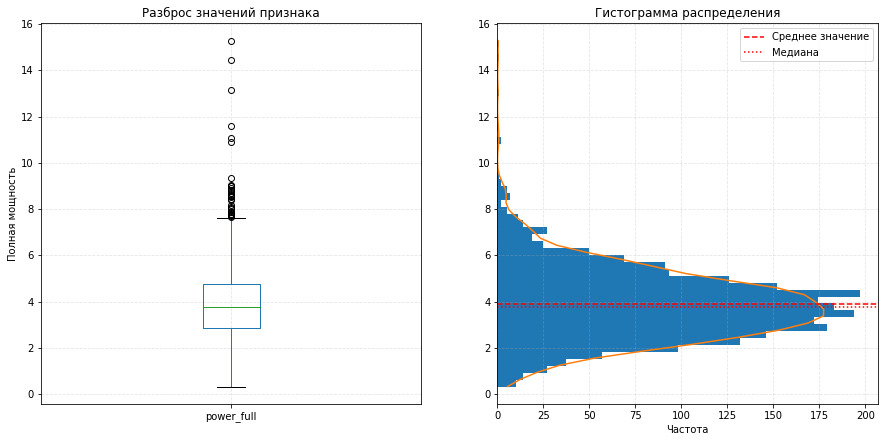

Описательная информация для признака 'power_full':
Минимальное значение: 0.33 	|	Максимальное значение: 15.29
Среднее значение: 3.89
Медиана: 3.77
Межквартильный размах IQR: 1.92
Границы нормальных значений: от 0.33 до 7.65


In [81]:
stat_num(data, 'power_full')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 3.89.
* Есть значения выше границы нормальных значений, но они не являются аномальными.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'heat_duration'

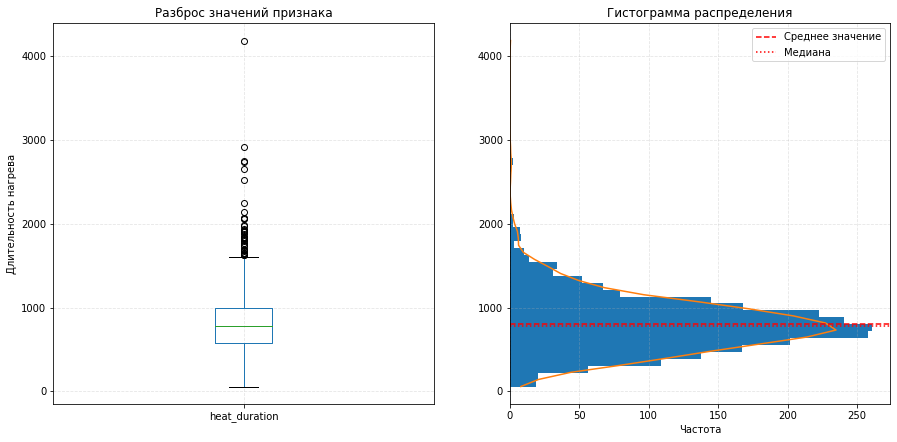

Описательная информация для признака 'heat_duration':
Минимальное значение: 57.0 	|	Максимальное значение: 4189.0
Среднее значение: 808.04
Медиана: 778.0
Межквартильный размах IQR: 412.0
Границы нормальных значений: от 57.0 до 1611.0


In [82]:
stat_num(data, 'heat_duration')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 808.04.
* Есть значения выше границы нормальных значений, но они не являются аномальными.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'energy_full'

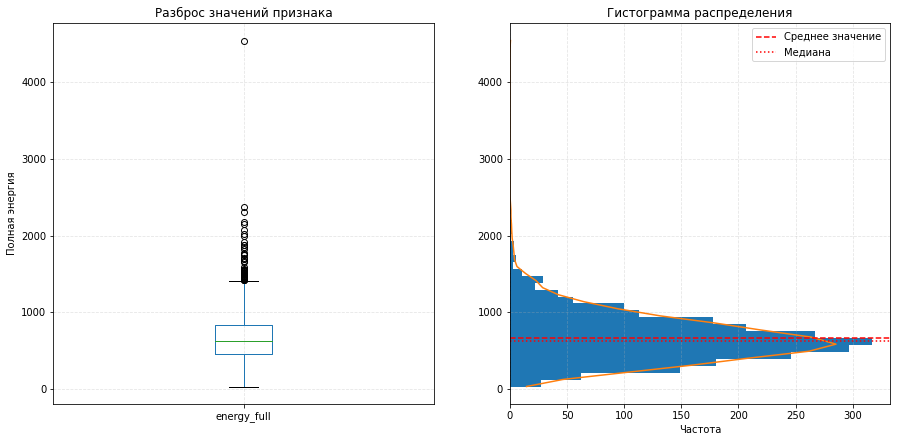

Описательная информация для признака 'energy_full':
Минимальное значение: 33.43 	|	Максимальное значение: 4546.41
Среднее значение: 670.11
Медиана: 630.91
Межквартильный размах IQR: 383.77
Границы нормальных значений: от 33.43 до 1417.3


In [83]:
stat_num(data, 'energy_full')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 670.11.
* Есть значения выше границы нормальных значений, но они не являются аномальными.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'cos_phi'

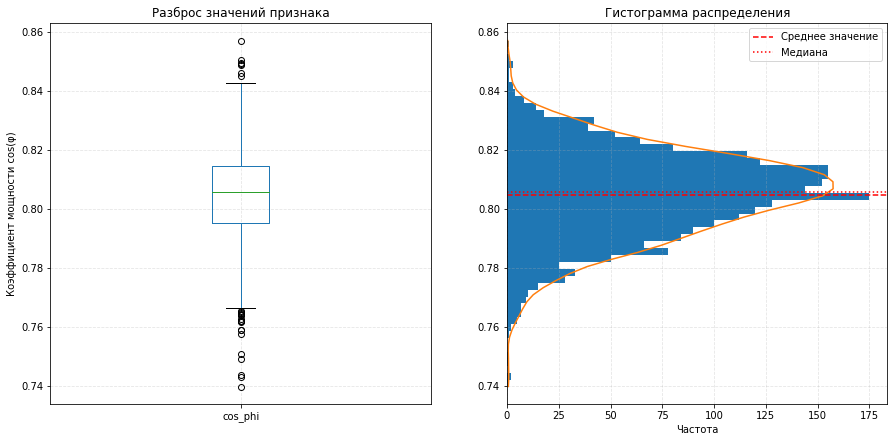

Описательная информация для признака 'cos_phi':
Минимальное значение: 0.74 	|	Максимальное значение: 0.86
Среднее значение: 0.8
Медиана: 0.81
Межквартильный размах IQR: 0.02
Границы нормальных значений: от 0.77 до 0.84


In [84]:
stat_num(data, 'cos_phi')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 0.8.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'power_ratio'

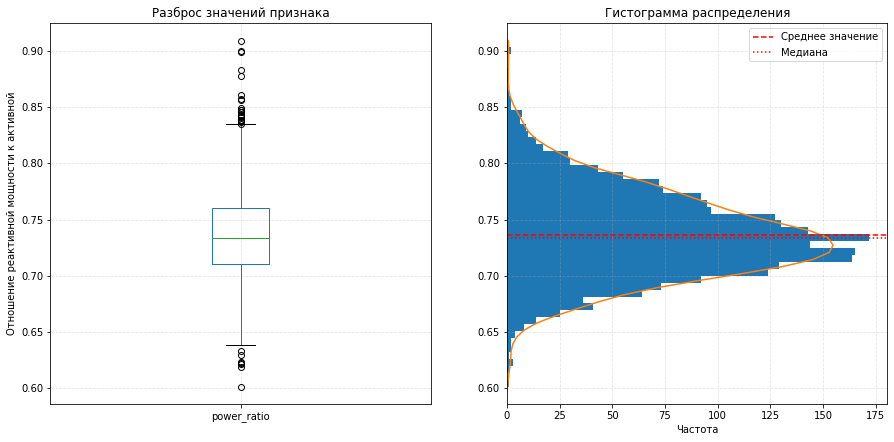

Описательная информация для признака 'power_ratio':
Минимальное значение: 0.6 	|	Максимальное значение: 0.91
Среднее значение: 0.74
Медиана: 0.73
Межквартильный размах IQR: 0.05
Границы нормальных значений: от 0.64 до 0.84


In [85]:
stat_num(data, 'power_ratio')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 0.74.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'gas'

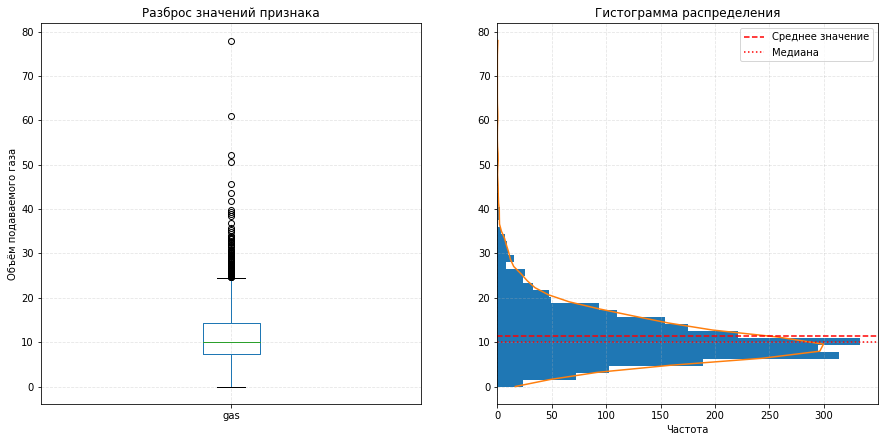

Описательная информация для признака 'gas':
Минимальное значение: 0.01 	|	Максимальное значение: 78.0
Среднее значение: 11.38
Медиана: 10.1
Межквартильный размах IQR: 6.93
Границы нормальных значений: от 0.01 до 24.62


In [86]:
stat_num(data, 'gas')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 11.38.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'temp_start'

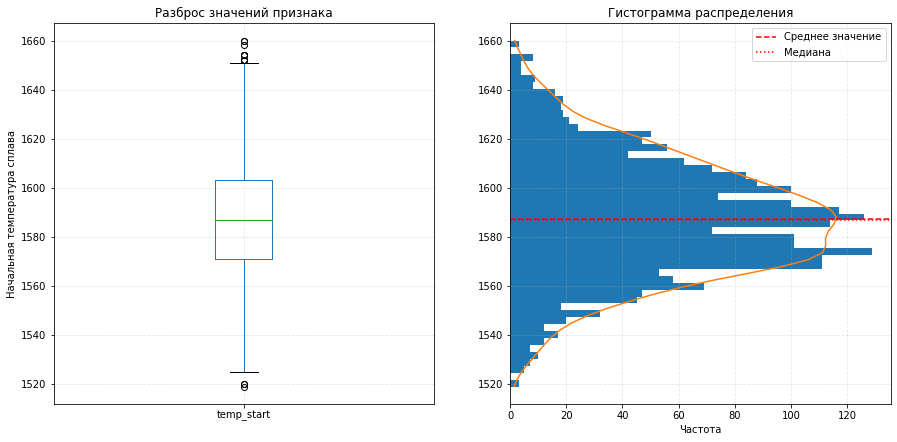

Описательная информация для признака 'temp_start':
Минимальное значение: 1519.0 	|	Максимальное значение: 1660.0
Среднее значение: 1587.37
Медиана: 1587.0
Межквартильный размах IQR: 32.0
Границы нормальных значений: от 1523.0 до 1651.0
Дисперсия значений признака: 558.05


In [87]:
stat_num(data, 'temp_start')
print(bold + 'Дисперсия значений признака:' + end, round(data['temp_start'].var(), 2))

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 1587.37.
* Дисперсия значений начальной температуры 558.05.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'temp_final'

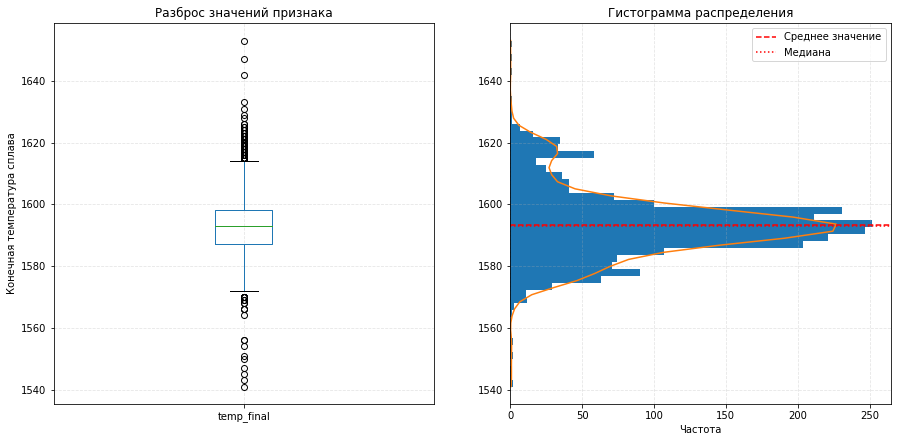

Описательная информация для признака 'temp_final':
Минимальное значение: 1541.0 	|	Максимальное значение: 1653.0
Среднее значение: 1593.37
Медиана: 1593.0
Межквартильный размах IQR: 11.0
Границы нормальных значений: от 1570.5 до 1614.5
Дисперсия значений признака: 125.65


In [88]:
stat_num(data, 'temp_final')
print(bold + 'Дисперсия значений признака:' + end, round(data['temp_final'].var(), 2))

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 1593.37.
* Среднее значение конечной температуры незначительно выше среднего значения начальной - разница около 6 градусов.
* Дисперсия значений конечной температуры составляет 125.6, что значительно меньше, чем для начальной (558.05).
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Признак 'temp_duration'

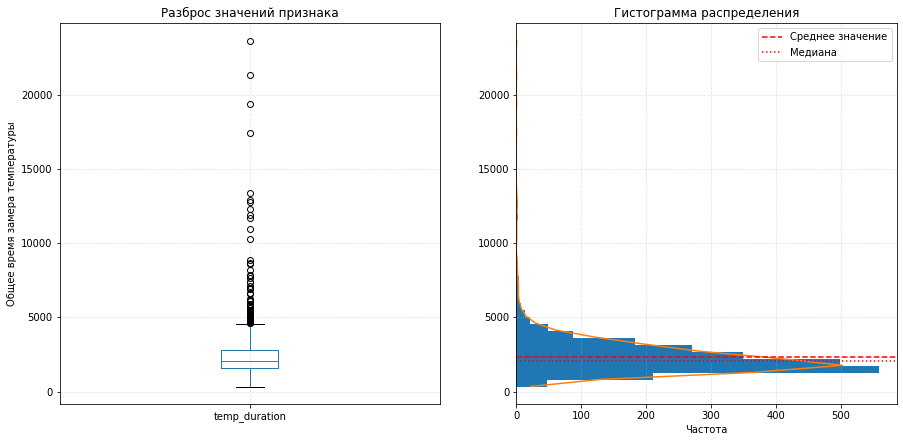

Описательная информация для признака 'temp_duration':
Минимальное значение: 339.0 	|	Максимальное значение: 23674.0
Среднее значение: 2323.42
Медиана: 2046.0
Межквартильный размах IQR: 1212.0
Границы нормальных значений: от 339.0 до 4611.0


In [89]:
stat_num(data, 'temp_duration')

На графиках заметны значения признака на порядок отличающиеся от среднено значения.

Определим в какой партии встречается это значение и отобразим для этой партии время нагрева и общее время процесса:

In [90]:
data[['heat_duration', 'temp_duration']][data['temp_duration'] == data['temp_duration'].max()]

,heat_duration,temp_duration
key,,
1689,4189.00,23674.00


Отобразим для данной партии все значения с временными метками:

In [91]:
print('Количество замеров температуры:', data_temp[data_temp['key'] == 1689].shape[0])
display(data_temp[data_temp['key'] == 1689])

Количество замеров температуры: 16


,key,temp_time,temp
9467,1689,2019-07-05 08:07:11,1583.00
9468,1689,2019-07-05 08:11:56,1591.00
9469,1689,2019-07-05 08:20:43,1597.00
9470,1689,2019-07-05 08:32:41,1600.00
9471,1689,2019-07-05 08:40:50,1602.00
9472,1689,2019-07-05 11:22:57,1608.00
9473,1689,2019-07-05 11:30:40,1526.00
9474,1689,2019-07-05 12:39:10,1559.00
9475,1689,2019-07-05 12:51:31,1575.00
9476,1689,2019-07-05 14:05:04,1626.00


В силу каких-то причин эта партия сплава обрабатывалась весьма долго - более 6 часов. Тем не менее, нет оснований считать такое поведение аномальным.

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 2323.
* Присутствуют значения на порядок отличающиеся от среднего. Такое встречается для партий с большим количеством итераций замера температуры. 
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Группа признаков 'bulk_x'
Распределение признаков `bulk_1` ... `bulk_15` рассмотрено ранее: <a href="#Признаки-'bulk_x'">Анализ распределния признаков bulk_x</a>. В процессе формирования новых признаков над ними не производилось никаких преобразований, поэтому повторно рассматривать их не будем. 

<a id="bulk_8"></a>Проверим как сохранилось распределение значений признаков:

In [92]:
pd.DataFrame({
    'Количество уникальных значений': 
    [len(data[i].unique()) for i in data.filter(like='bulk_').columns]}, 
    index=data.filter(like='bulk_').columns)

,Количество уникальных значений
bulk_1,38
bulk_2,13
bulk_3,265
bulk_4,199
bulk_5,43
bulk_6,189
bulk_7,14
bulk_8,2
bulk_9,10
bulk_10,71


Рассмотрим распределение признака суммарного объема сыпучих материалов:

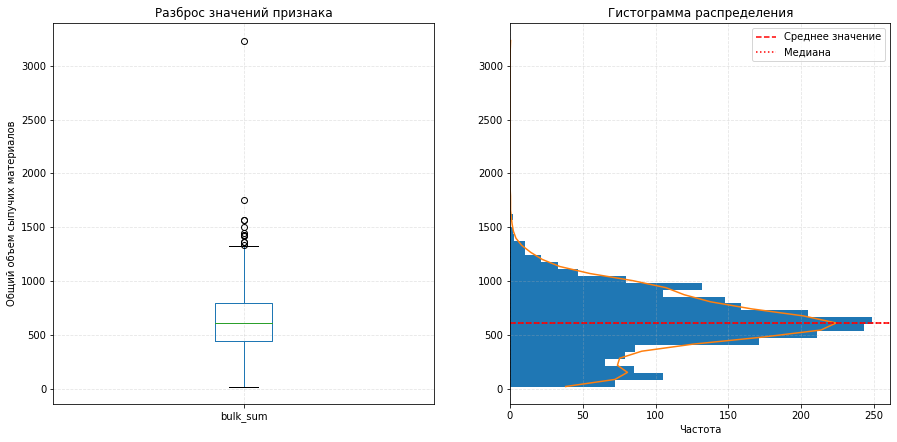

Описательная информация для признака 'bulk_sum':
Минимальное значение: 19.0 	|	Максимальное значение: 3235.0
Среднее значение: 609.96
Медиана: 609.0
Межквартильный размах IQR: 356.0
Границы нормальных значений: от 19.0 до 1330.0


In [93]:
stat_num(data, 'bulk_sum')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 609.96.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

### Группа признаков 'wire_x'
Распределение признаков `wire_1` ... `wire_9` рассмотрено ранее: <a href="#Признаки-'wire_x'">Анализ распределния признаков wire_x</a>. В процессе формирования новых признаков над ними не производилось никаких преобразований, поэтому повторно рассматривать их не будем. 

Проверим как сохранилось распределение значений признаков:

In [94]:
pd.DataFrame({
    'Количество уникальных значений': 
    [len(data[i].unique()) for i in data.filter(like='wire_').columns]}, 
    index=data.filter(like='wire_').columns)

,Количество уникальных значений
wire_1,1810
wire_2,563
wire_3,36
wire_4,13
wire_5,1
wire_6,43
wire_7,5
wire_8,10
wire_9,22
wire_sum,2077


Как видим, для признака `wire_5` осталось одно уникальное значение:

In [95]:
data['wire_5'].unique()

array([0.])

Таким образом, данные признак не несет полезной нагрузки, будет правильно его удалить:

In [96]:
data.drop('wire_5', axis=1, inplace=True)

Рассмотрим распределение признака проволочных объема сыпучих материалов:

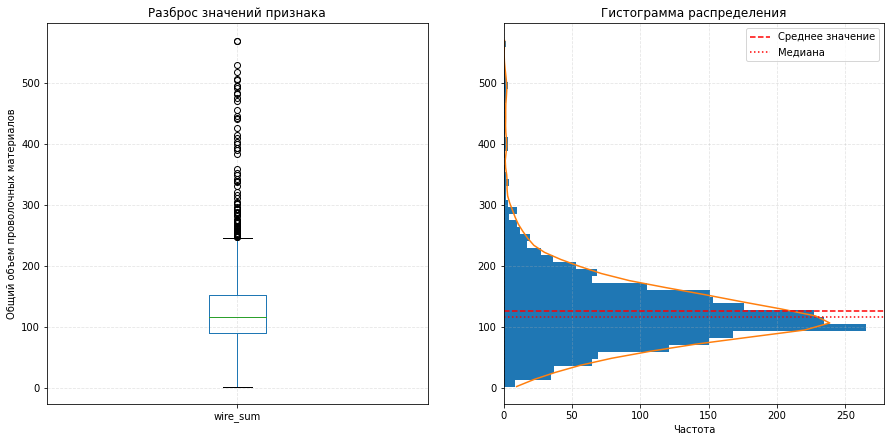

Описательная информация для признака 'wire_sum':
Минимальное значение: 1.92 	|	Максимальное значение: 568.78
Среднее значение: 125.18
Медиана: 116.1
Межквартильный размах IQR: 62.54
Границы нормальных значений: от 1.92 до 245.36


In [97]:
stat_num(data, 'wire_sum')

**Вывод**:
* Наблюдается нормальное распределение признака вокруг среднего значения составляющего 125.18.
* Удален признак `wire_5` поскольку в процессе создания новых признаков и формирования нового набора данных остались только такие его значения, которые равны 0. Таким образом, количество обучающих признаков стало равно 34.
* Явно аномальных значений не наблюдается.

<a href="#point0">Вернуться к оглавлению</a>

## Корреляционный анализ
Рассчитаем матрицу корреляции для имеющихся в наборе признаков.

Для оценки корреляции использум коэффициент $\phi_{k}$, поскольку он лучше учитывает нелинейные зависимости по сравнению с коэффициентом корреляции Пирсона.

Следует принять во внимание, что признак `bulk_8`, который содержит <a href="#bulk_8">2 уникальных значения</a>, не следует относить к интервальным признакам.

In [98]:
# создаём список с наименованиями непрерывных признаков:
interval_cols = data.drop(['bulk_8'], axis=1).columns

# формируем матрицу корреляции:
phik_overview = data.phik_matrix(interval_cols=interval_cols)

# отображаем размерность матрицы:
print('phik_overview.shape:', phik_overview.shape)

phik_overview.shape: (34, 34)


Поскольку в нашем наборе данных имеем большой набор признаков (34 шт), отобразим матрицу корреляции по частям:

In [99]:
title_text = 'Матрица корреляции для группы признаков '

# Отображение матрицы корреляции:
# Группа 1:
display(phik_overview.loc[:, ~phik_overview.columns.str.contains('bulk_|wire_', regex=True)]
        .style.set_caption(title_text + 'об электродах, газе, температуре:')
        .format('{:.2f}'))

# Группа 2:
display(phik_overview.filter(like='bulk_')
       .style.set_caption(title_text + 'о подаче сыпучих материалов:')
       .format('{:.2f}'))

# Группа 3:
display(phik_overview.filter(like='wire_')
       .style.set_caption(title_text + 'о подаче проволочных материалов:')
       .format('{:.2f}'))

,power_full,heat_duration,energy_full,cos_phi,power_ratio,gas,temp_start,temp_final,temp_duration
power_full,1.00,0.78,0.80,0.26,0.27,0.57,0.25,0.49,0.72
heat_duration,0.78,1.00,0.85,0.14,0.15,0.50,0.35,0.32,0.73
energy_full,0.80,0.85,1.00,0.12,0.12,0.40,0.29,0.27,0.73
cos_phi,0.26,0.14,0.12,1.00,1.00,0.00,0.10,0.00,0.00
power_ratio,0.27,0.15,0.12,1.00,1.00,0.00,0.07,0.00,0.00
bulk_1,0.47,0.37,0.38,0.00,0.00,0.66,0.10,0.18,0.23
bulk_2,0.32,0.17,0.06,0.00,0.00,0.68,0.22,0.62,0.49
bulk_3,0.00,0.07,0.05,0.00,0.00,0.05,0.12,0.00,0.00
bulk_4,0.00,0.10,0.07,0.00,0.00,0.03,0.24,0.29,0.00
bulk_5,0.23,0.03,0.00,0.00,0.00,0.25,0.09,0.34,0.30


,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,bulk_sum
power_full,0.47,0.32,0.00,0.00,0.23,0.38,0.68,0.00,0.00,0.00,0.00,0.50,0.53,0.49,0.19,0.65
heat_duration,0.37,0.17,0.07,0.10,0.03,0.21,0.55,0.00,0.00,0.00,0.09,0.52,0.52,0.59,0.26,0.73
energy_full,0.38,0.06,0.05,0.07,0.00,0.23,0.29,0.00,0.00,0.00,0.01,0.40,0.50,0.46,0.22,0.86
cos_phi,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
power_ratio,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
bulk_1,1.00,0.23,0.00,0.06,0.12,0.00,0.50,0.00,0.00,0.00,0.00,0.68,0.00,0.67,0.04,0.83
bulk_2,0.23,1.00,0.00,0.09,0.60,0.00,0.91,0.00,0.00,0.00,0.00,0.05,0.00,0.17,0.06,0.02
bulk_3,0.00,0.00,1.00,0.30,0.06,0.29,0.00,0.02,0.02,0.00,0.29,0.00,0.00,0.06,0.00,0.22
bulk_4,0.06,0.09,0.30,1.00,0.13,0.26,0.02,0.00,0.05,0.08,0.00,0.13,0.00,0.08,0.13,0.17
bulk_5,0.12,0.60,0.06,0.13,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.07,0.00,0.04,0.10,0.02


,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,wire_sum
power_full,0.19,0.28,0.35,0.65,0.27,0.77,0.00,0.00,0.21
heat_duration,0.09,0.12,0.09,0.49,0.09,0.57,0.00,0.00,0.06
energy_full,0.07,0.13,0.04,0.24,0.07,0.27,0.00,0.00,0.03
cos_phi,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.17,0.00
power_ratio,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.16,0.00
bulk_1,0.15,0.25,0.17,0.28,0.23,0.26,0.00,0.00,0.00
bulk_2,0.28,0.00,0.63,0.96,0.82,0.83,0.00,0.00,0.19
bulk_3,0.29,0.22,0.00,0.00,0.07,0.00,0.02,0.00,0.18
bulk_4,0.35,0.29,0.04,0.05,0.00,0.07,0.05,0.00,0.21
bulk_5,0.20,0.00,0.43,0.53,0.58,0.37,0.00,0.00,0.11


Отобразим тепловые карты, аналогично по частям, для матриц корреляции:

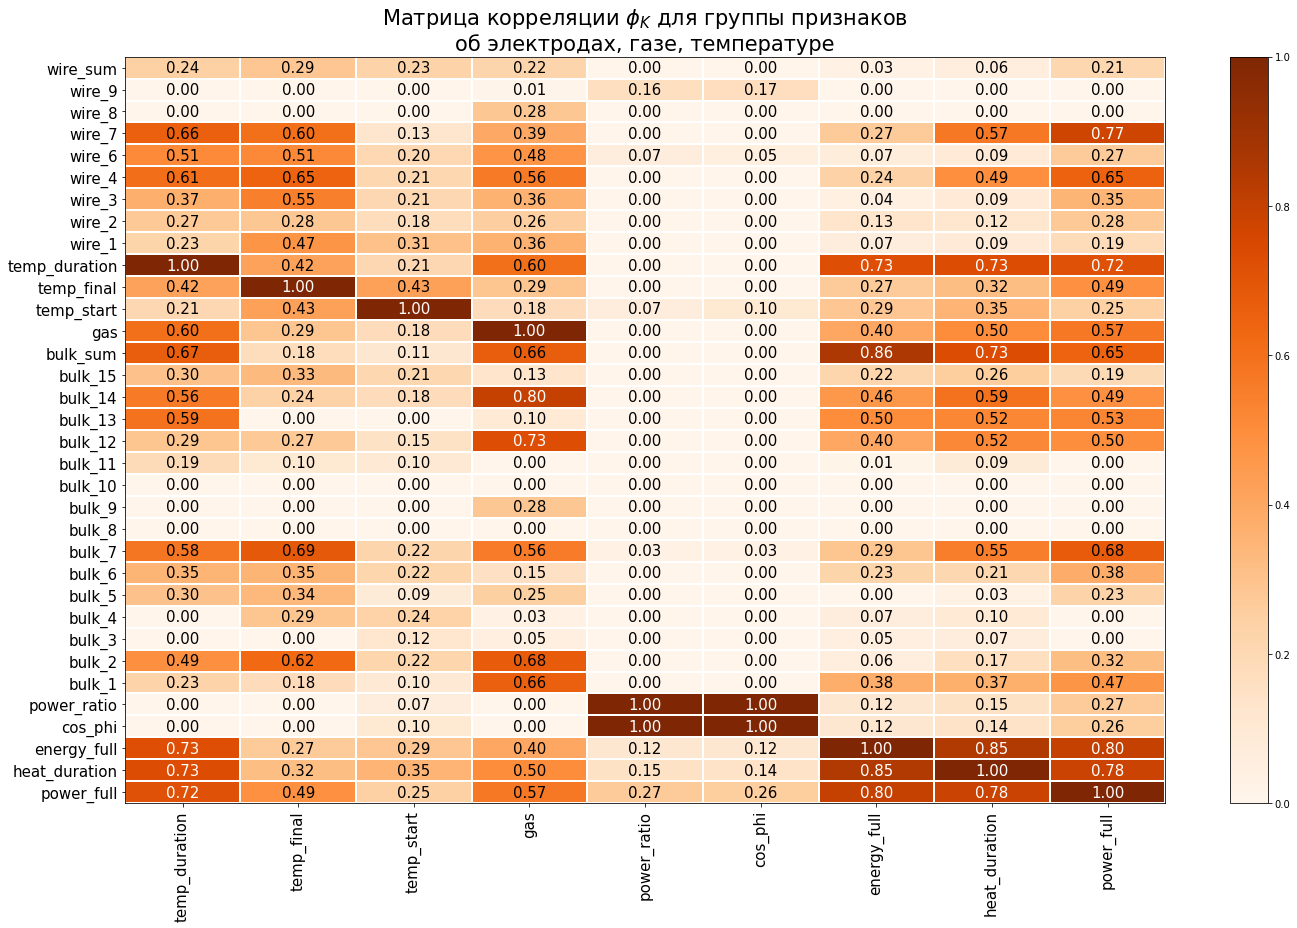

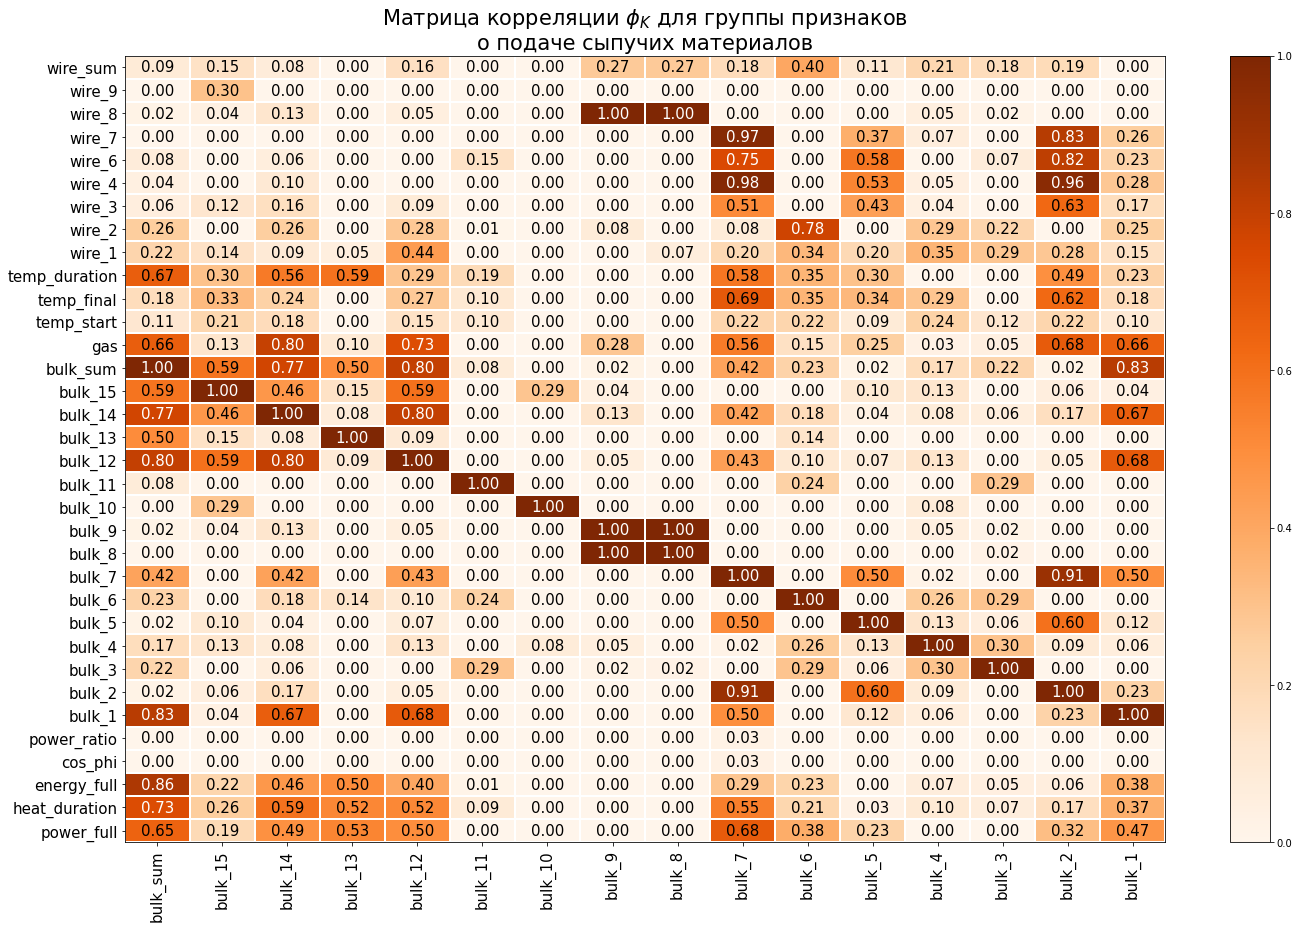

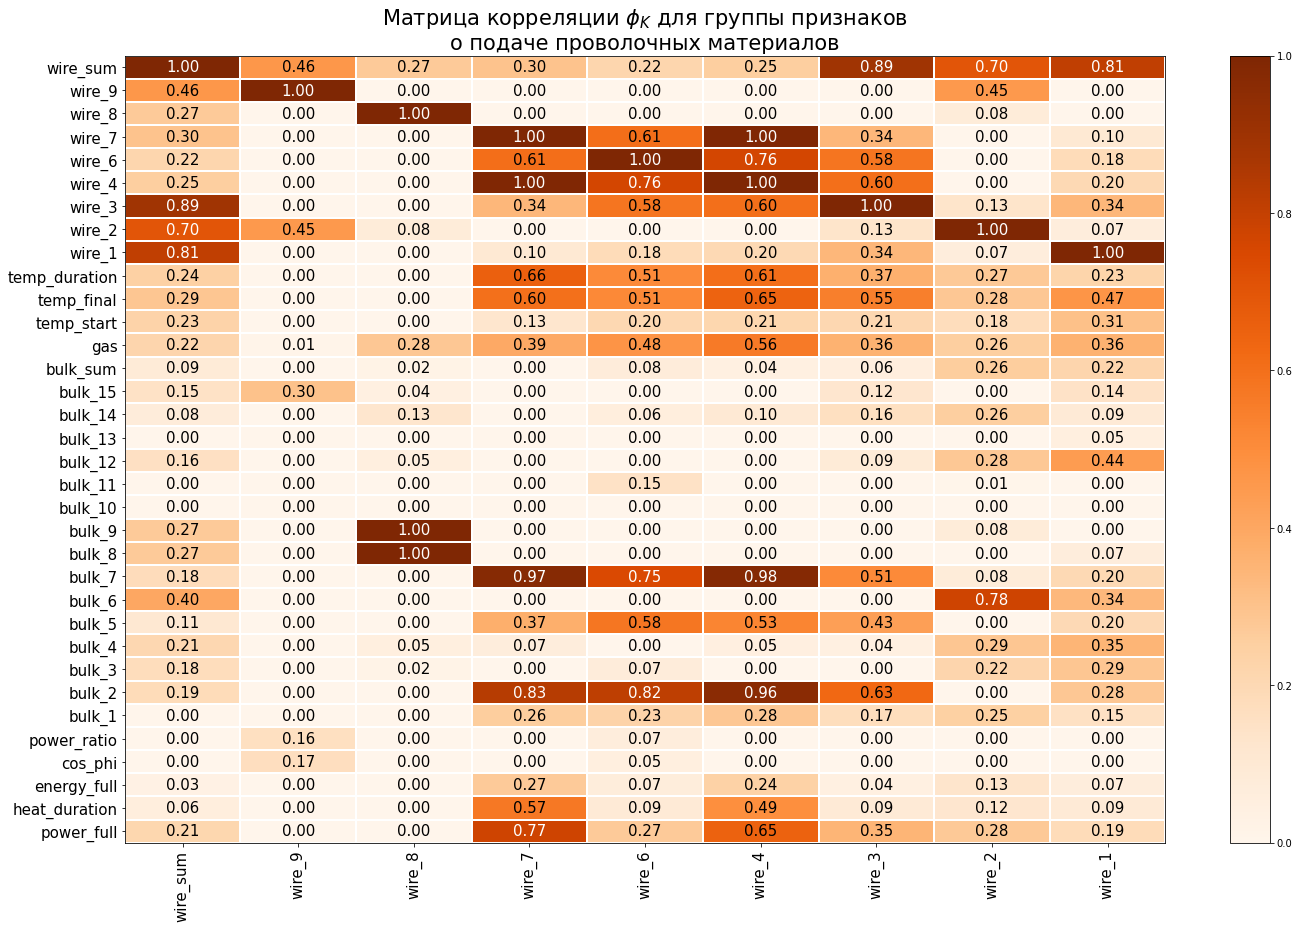

In [100]:
# Группа 1:
show_heat_map(phik_overview.loc[:, ~phik_overview.columns.str.contains('bulk_|wire_', regex=True)], 
              '\nоб электродах, газе, температуре')

# Группа 2:
show_heat_map(phik_overview.filter(like='bulk_'), 
              '\nо подаче сыпучих материалов')

# Группа 3:
show_heat_map(phik_overview.filter(like='wire_'), 
              '\nо подаче проволочных материалов')

Отобразим 10 признаков имеющих наибольшую корреляцию с целевым признаком:

In [101]:
# обозначение наименования целевого признака:
target = 'temp_final'

# Вывод топ-10 коррелирующих признаков:
pd.DataFrame(phik_overview[target]).sort_values(by=target, ascending=False)[1:11]

,temp_final
bulk_7,0.69
wire_4,0.65
bulk_2,0.62
wire_7,0.60
wire_3,0.55
wire_6,0.51
power_full,0.49
wire_1,0.47
temp_start,0.43
temp_duration,0.42


<a id="multicol"></a>
Проверим признаки на наличие мультиколлинеарности:

In [102]:
multicol_check(phik_overview)

,Признак,Количество превышений,Мультиколлинеарные признаки
3,cos_phi,1,[power_ratio]
4,power_ratio,1,[cos_phi]
6,bulk_2,2,"[bulk_7, wire_4]"
11,bulk_7,3,"[bulk_2, wire_4, wire_7]"
12,bulk_8,2,"[bulk_9, wire_8]"
13,bulk_9,2,"[bulk_8, wire_8]"
28,wire_4,3,"[bulk_2, bulk_7, wire_7]"
30,wire_7,2,"[bulk_7, wire_4]"
31,wire_8,2,"[bulk_8, bulk_9]"


Всего признаков с мультиколлинеарностью: 9


А также проверим какие признаки показывают очень слабую корреляцию с целевым признаком ($\phi_k < 0.1$):

In [103]:
low_phi = phik_overview[phik_overview[target] < 0.1]
display(pd.DataFrame(low_phi[target]))
print(f'Всего признаков с низкой корреляцией с целевым признаком - {low_phi.shape[0]}:')
print(low_phi.index.to_list())

,temp_final
cos_phi,0.00
power_ratio,0.00
bulk_3,0.00
bulk_8,0.00
bulk_9,0.00
bulk_10,0.00
bulk_13,0.00
wire_8,0.00
wire_9,0.00


Всего признаков с низкой корреляцией с целевым признаком - 9:
['cos_phi', 'power_ratio', 'bulk_3', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_13', 'wire_8', 'wire_9']


**Вывод**:
* Для набора признаков расчитана матрица корреляции на основе коэффициента $\phi_{k}$.
* 10 признаков, имеющих наибольшую степень корреляции с целевым признаком:

Признак|$\phi_{k}$
-|-
bulk_7|0.69
wire_4|0.65
bulk_2|0.62
wire_7|0.60
wire_3|0.55
wire_6|0.51
power_full|0.49
wire_1|0.47
temp_start|0.43
temp_duration|0.42

* Среди набора признаков - 9 признаков обладают мультиколлинеарностью: `cos_phi`, `power_ratio`, `bulk_2`, `bulk_7`, `bulk_8`, `bulk_9`, `wire_4`, `wire_7`, `wire_8`. Это следует учесть при формирования списка обучающих признаков для обучения линейных моделей.
* Среди набора признаков - 9 признаков с низкой корреляцией с целевым признаком: `cos_phi`, `power_ratio`, `bulk_3`, `bulk_8`, `bulk_9`, `bulk_10`, `bulk_13`, `wire_8`, `wire_9`. 

<a href="#point0">Вернуться к оглавлению</a>

## Обучение моделей машинного обучения
### Подготовка данных
Зададим переменные с обучающими и целевым признаками:

In [104]:
# Формирование переменных X и y:
X = data.drop('temp_final', axis=1)
y = data['temp_final']

# Отобразим форму признаков:
X.shape, y.shape

((2325, 33), (2325,))

Сформируем обучающую и тестовую выборки для данных.
* `test_size=TEST_SIZE` - выборки делятся в пропорции <span style="border-width:2px; border-style:solid; border-color:#ddb62b; padding: 3px;">75% {обучающая}</span> + <span style="border-width:2px; border-style:solid; border-color:#d160c4; padding: 3px;">25% {валидационная}</span>
* `random_state = RANDOM_STATE` - фиксация псевдослучайности алгоримта разбиения.

Проверим заданное ранее значение:

In [105]:
RANDOM_STATE

50525

* Для повышения точности характера распределения целевого признака в обучающей и тестовой выборках я использую стратификацию.
  * Поскольку целевой признак - это числовая непрерывная величина, для возможности стратификации нужно разбить все значения на корзины: `y_binned = pd.cut(y, bins=10, labels=False)`
  * Я разбиваю данные на 10 корзин `bins=10`.

In [106]:
# переменная задающая размер тестовой выборки:
TEST_SIZE = 0.25

# разбиение целевого признака на корзины:
y_binned = pd.cut(y, bins=10, labels=False)

# разбиение X и y на train/test выборки:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify=y_binned)

Графически отобразим характер распределения целевого признака для полного набора данных и полученных выборок:

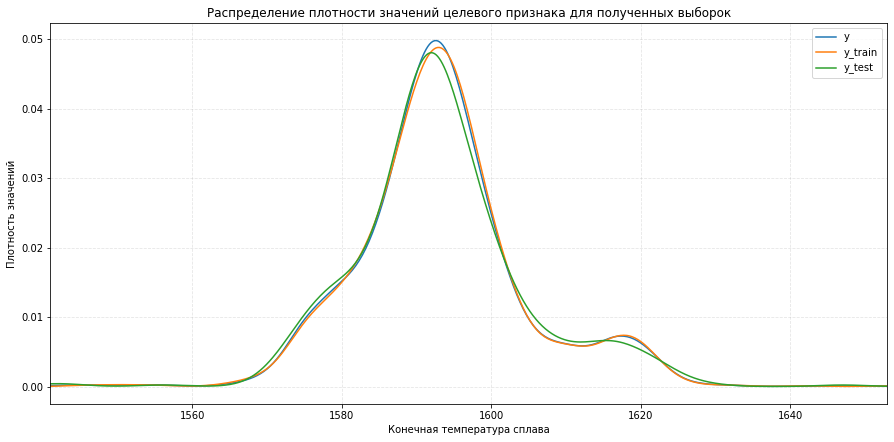

In [107]:
# Графики распределения целевого признака в выборках:
y.plot.kde(label='y')
y_train.plot.kde(label='y_train')
y_test.plot.kde(label='y_test')
plt.title(f"Распределение плотности значений целевого признака для полученных выборок")
plt.xlabel(feature_dsc[target])
plt.ylabel("Плотность значений")
plt.xlim(y.min(), y.max())
plt.legend()
plt.show()

**Вывод**:
* Сформированы переменные содержащие обучающие и целевой признаки.
* Данные разбиты на обучающие и тестовые выборки в пропорции 75/25%.
* Для сохранения характера распределения целевого признака использована стратификация.

<a href="#point0">Вернуться к оглавлению</a>

### Обучение линейных моделей
Для ряда задач использование линейных моделей позволяет достичь приемлемой точности прогноза. При этом, как правило, скорость обучения линейных моделей заметно выше, чем скорость обучения моделей использующих другие алгоритмы.

Для решения текущей задачи я рассмотрю две линейные модели:
1. **LinearRegression** - это классическая модель регрессии основанная на методе наименьших квадратов.
2. **LinearSVR** - это линейная версия модели опорных векторов (Support Vector). Она оптимизирует модель с использованием зонной (margin-based) функции потерь.

Мультиколлинеарность обучающих признаков является критичной для линейных моделей, поэтому необходимо отобрать признаки, чтобы исключить их взаимное влияние. <a href="#multicol">Ранее мы определили</a>, что 9 признаков обладают мультиколлинеарностью с учетом коэффициента $\phi_{k}$. Проверим также с учетом коэффициента линейной зависимости:

In [108]:
multicol_check(X_train.corr(), threshold=0.89)

,Признак,Количество превышений,Мультиколлинеарные признаки
1,heat_duration,1,[energy_full]
2,energy_full,1,[heat_duration]
13,bulk_9,1,[wire_8]
30,wire_8,1,[bulk_9]


Всего признаков с мультиколлинеарностью: 4


Линейную мультиколлинеарность показывают лишь 4 признака.

<div style="border:solid orange 2px; padding: 20px">
Для каждой задачи критерии отбора обучающих признаков индивидуальны. Для обучения линейных моделей я попробовал удалить два разных набора признаков: которые показывают <ins>линейную взаимозависимость</ins>, а также <ins>взаимозависимость по коэффициенту</ins> $\phi_{k}$. Второй способ позволил достичь более лучшей метрики, поэтому его и буду использовать в данной задаче.

Еще раз отобразим мультиколлинеарность с учетом коэффициента $\phi_{k}$:

In [109]:
multicol_check(phik_overview)

,Признак,Количество превышений,Мультиколлинеарные признаки
3,cos_phi,1,[power_ratio]
4,power_ratio,1,[cos_phi]
6,bulk_2,2,"[bulk_7, wire_4]"
11,bulk_7,3,"[bulk_2, wire_4, wire_7]"
12,bulk_8,2,"[bulk_9, wire_8]"
13,bulk_9,2,"[bulk_8, wire_8]"
28,wire_4,3,"[bulk_2, bulk_7, wire_7]"
30,wire_7,2,"[bulk_7, wire_4]"
31,wire_8,2,"[bulk_8, bulk_9]"


Всего признаков с мультиколлинеарностью: 9


Заметно 4 группы коррелирующих признаков:
* `heat_duration` <-> `energy_full` (линейно)
* `cos_phi` <-> `power_ratio` ($\phi_{k}$)
* `bulk_7` <-> `bulk_2` <-> `wire_4` <-> `wire_7` ($\phi_{k}$)
* `bulk_8` <-> `bulk_9` <-> `wire_8` ($\phi_{k}$)

Для каждой группы отберем один признак показывающий большую корреляцию с целевым признаком:

In [110]:
display(data[['heat_duration', 'energy_full', 'temp_final']].corr().style)
display(data[['cos_phi', 'power_ratio', 'temp_final']].corr().style)
display(data[['bulk_7', 'bulk_2', 'wire_4', 'wire_7', 'temp_final']].corr().style)
display(data[['bulk_8', 'bulk_9', 'wire_8', 'temp_final']].corr().style)

,heat_duration,energy_full,temp_final
heat_duration,1.000000,0.900439,0.278418
energy_full,0.900439,1.000000,0.256304
temp_final,0.278418,0.256304,1.000000


,cos_phi,power_ratio,temp_final
cos_phi,1.000000,-0.999512,0.022985
power_ratio,-0.999512,1.000000,-0.023285
temp_final,0.022985,-0.023285,1.000000


,bulk_7,bulk_2,wire_4,wire_7,temp_final
bulk_7,1.000000,0.679353,0.740570,0.372248,-0.107289
bulk_2,0.679353,1.000000,0.699340,0.431735,-0.082466
wire_4,0.740570,0.699340,1.000000,0.602964,-0.159737
wire_7,0.372248,0.431735,0.602964,1.000000,-0.137275
temp_final,-0.107289,-0.082466,-0.159737,-0.137275,1.000000


,bulk_8,bulk_9,wire_8,temp_final
bulk_8,1.000000,0.488391,0.321039,-0.026590
bulk_9,0.488391,1.000000,0.974968,-0.016081
wire_8,0.321039,0.974968,1.000000,-0.010772
temp_final,-0.026590,-0.016081,-0.010772,1.000000


Мультиколлинеарные признаки, которые показали меньшую корреляцию с целевым:
1. `energy_full`
2. `cos_phi`
3. `bulk_7`, `bulk_2` `wire_7`
4. `bulk_9`, `wire_8`

Данные признаки исключим из списка обучающих для линейных моделей:

In [111]:
linear_feat_list = X.drop(['energy_full', 
                           'cos_phi', 
                           'bulk_7', 'bulk_2', 'wire_7', 
                           'bulk_9', 'wire_8'], axis=1).columns

Среди наших данных все обучающие признаки это непрерывные числовые величины

In [112]:
num_columns = X_train[linear_feat_list].columns.to_list()

Создаём общий пайплайн для подготовки данных:

In [113]:
data_preprocessor = ColumnTransformer(
    [('num', MinMaxScaler(), num_columns)],
    remainder='passthrough'
)

Создаём итоговый пайплайн: подготовка данных и модель. В качестве модели по умолчанию - LinearRegression:

In [114]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

Создаем сетку, содержающую набор моделей и их гиперпараметров.

Используются следующие гиперпараметры:
* Модель **LinearRegression**:
  * `fit_intercept` - Определяет, нужно ли добавлять константный член (свободный член) в модель.
  
  
* Модель **LinearSVR**:
  * `loss` - Задаёт функцию потерь: `epsilon_insensitive`: стандартная SVR-потеря с зоной нечувствительности.
  * `fit_intercept` - аналогичный гиперпараметр, определяющий добавление константного члена в модель.
  * `max_iter` - Максимальное количество итераций для оптимизатора. Если решение не найдено за это число итераций, будет выброшено предупреждение.
  * `C` - Параметр регуляризации (штарф за ошибку).
  * `epsilon` - Определяет размер зоны нечувствительности вокруг цели, внутри которой ошибки не штрафуются.

К обучающим признакам применяется применяется масштабирование (стандартизация или нормализация), либо данные остаются в исходном виде.

<div style="border:solid orange 2px; padding: 20px">
<font color='red'>*</font> <i>Примечание</i>: оптимальные значения гиперпаметров LinearSVR получены с помощью инструмента <b>Optuna</b>. Для финальной сетки оставил небольшое число вариаций с целью продемонстрировать лучший достигнутый результат и сократить время на обучение моделей.

In [115]:
param_grid = [
    # словарь для модели LinearRegression
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],      
        'preprocessor__num': ['passthrough']  
    },
    
    # словарь для модели LinearSVR
    {
        'models': [LinearSVR(random_state=RANDOM_STATE,
                             loss='epsilon_insensitive',
                             fit_intercept=False,
                             max_iter=1550
                            )],
        'models__C': [8.659234540207882e-05, 0.1],
        'models__epsilon': [1.0e-08, 0.1],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Создаем пайплайн с применением автоматизированного поиска гиперпараметров **GridSearchCV** со следующими параметрами:
* Установка модели пайплайна по умолчанию `pipe_final`.
* Применение заданной сетки гиперпараметров моделей `param_grid`.
* `cv=5` - применяется кросс-валидация из 5 блоков
* `scoring='neg_mean_absolute_error'` - в качестве метрики качества моделей используется MAE. 
* `n_jobs=-1` - количество вычислительных мощностей (чтобы считалось быстрее, указывают `-1`)

In [116]:
grid_search_linear = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

Запускаем пайплайн на "фильтрованных" тренировочных данных с опцией игнорирования предупреждений:

In [117]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)    
    grid_search_linear.fit(X_train[linear_feat_list], y_train)

Отобразим полученные результаты:

In [118]:
show_gs_result(grid_search_linear).style

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
0,1,LinearRegression,5.964194,0.060730,"{'models': LinearRegression(), 'models__fit_intercept': True, 'preprocessor__num': 'passthrough'}"
4,2,LinearSVR,10.427036,0.052735,"{'models': LinearSVR(fit_intercept=False, max_iter=1550, random_state=50525), 'models__C': 8.659234540207882e-05, 'models__epsilon': 1e-08, 'preprocessor__num': 'passthrough'}"
7,3,LinearSVR,10.446407,0.055197,"{'models': LinearSVR(fit_intercept=False, max_iter=1550, random_state=50525), 'models__C': 8.659234540207882e-05, 'models__epsilon': 0.1, 'preprocessor__num': 'passthrough'}"
1,4,LinearRegression,10.683685,0.038747,"{'models': LinearRegression(), 'models__fit_intercept': False, 'preprocessor__num': 'passthrough'}"
13,5,LinearSVR,13.671135,0.147297,"{'models': LinearSVR(fit_intercept=False, max_iter=1550, random_state=50525), 'models__C': 0.1, 'models__epsilon': 0.1, 'preprocessor__num': 'passthrough'}"


**Вывод**:
* С помощью инструмента GridSearchCV обучено 2 наименования моделей - LinearRegression и LinearSVR.
* Модель LinearRegression показала приемлемую метрику качества на кросс-валидации: MAE=5.964194, что удовлетворяет заданному условию (MAE ≤ 6.8).

<div style="border:solid orange 2px; padding: 20px">
В контексте текущей задачи, у меня получилось, что модель LinearRegression показала приемлемую метрику качества, а для LinearSVR не удалось превзойти минимальный порог метрики. Можно было бы и ограничиться одной моделью LinearRegression и использовать для ее обучения более простой способ <code>cross_val_score</code>, но я все же решил оставить обе модели в сетке GridSearchCV для сравнения (плохой результат тоже по-своему информативен).<br><br>Если задаться целью осуществить обучение LinearRegression с помощью <code>cross_val_score</code>, то можно сделать следующим образом:

In [119]:
def lin_reg_cv(X_train, y_train):
    """
    Функция обучения модели LinearRegression на кросс-валидации. 
    """
    # Инициализация модели
    model = LinearRegression()
    
    # Фиксация времени начала кросс-валидации (cross_val_score не фиксирует время обучения)
    start = time.time()

    # Выполняем кросс-валидацию:
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,  
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    
    # Расчет длительности кросс-валидации
    fit_time = time.time() - start

    # Представляем результат в виде датафрейма:
    res = pd.DataFrame({'rank_test_score':[1],
                        'param_models':['LinearRegression'],
                        'mean_test_score':[-np.mean(scores)],
                        'mean_fit_time':[fit_time / 5],
                        'params':["{'models': LinearRegression()}"]
                       })
    return res

df_lin_reg = lin_reg_cv(X_train[linear_feat_list], y_train)
df_lin_reg.style # В таком виде можно присоединить результат к grid_search.cv_results_ 

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
0,1,LinearRegression,5.964194,0.056700,{'models': LinearRegression()}


<a href="#point0">Вернуться к оглавлению</a>

### Обучение ансамблевых моделей
Часто для решения задач машинного обучения используются ансамблевые модели. *Ансамблирование* - это метод машинного обучения при котором решать задачу обучаются несколько моделей, а потом их предсказания агрегируются (например, усредняются). Ансамблирование хороший способ повысить точность модели.

В рамках данной задачи я рассмотрю две ансамблевые модели:
1. **RandomForestRegressor**. Это ансамблевая модель, которая строит много деревьев решений и усредняет их прогнозы. Работает по принципу "бэггинг" (бутстрэп-агрегирование). Каждое дерево обучается на случайной подвыборке данных + случайный поднабор признаков.
2. **CatBoostRegressor**. Модель градиентного бустинга над деревьями решений. Модели градиентного бустинга тренируются последовательно - у каждой следующей модели веса корректируются  с учетом ошибки предыдущей.

Данные модели показывают достаточно хорошее качество прогноза, кроме того, они хорошо работают с признаками разного масштаба и с признаками обладающими мультиколлинеарностью.

Создаём итоговый пайплайн. В качестве модели по умолчанию - RandomForestRegressor, препроцессинг не производим.

In [120]:
pipeline = Pipeline(steps=[
    ('models', RandomForestRegressor(random_state=RANDOM_STATE))
])

Создаем сетку, содержающую набор моделей и их гиперпараметров.

Используются следующие гиперпараметры:
* Модель **RandomForestRegressor**:
  * `n_estimators` - количество деревьев в ансамбле. Большее количество деревьев обычно повышает стабильность и качество модели, но увеличивает время обучения.
  * `max_depth` - максимальная глубина дерева. Позволяет ограничить сложность дерева для предотвращения переобучения.
  * `min_samples_split` - минимальное количество образцов для разбиения узла. Ограничивает разбиение слишком малых подвыборок, что помогает контролировать сложность дерева.
  * `min_samples_leaf` - минимальное количество образцов в листовом узле. Предотвращает появление листьев с очень малым числом образцов.
  * `max_features` - количество признаков, выбираемых случайным образом для каждого разбиения. Позволяет вводить случайность и тем самым повышать обобщающую способность модели.
  
  
* Модель **CatBoostRegressor**:
  * `learning_rate` - отвечает за скорость обучения. Чем меньше значение, тем более постепенным будет обучение, но потребуется больше итераций.
  * `depth` - глубина деревьев. Определяет максимальную сложность каждого дерева.
  * `l2_leaf_reg` - L2-регуляризация для листьев дерева. L2-регуляризация означает, что все признаки остаются в модели, но значения их коэффициентов могут уменьшаться для борьбы с переобучением.
  * `bagging_temperature` - регулирует степень случайности при обучении (аналог bagging). Большие значения увеличивают разнообразие деревьев.
  * `border_count` - количество бинов (групп) для числовых признаков. Влияет на то, как модель дискретизирует непрерывные признаки.
  * `iterations` - количество итераций бустинга (число деревьев). Большее количество итераций повышает качество модели, но увеличивает риск переобучения.
  * `min_data_in_leaf` - минимальное количество образцов в листе дерева. Позволяет избежать переобучения за счёт увеличения минимального размера листьев.
  * `random_strength` - степень случайности при генерации сплита. Чем выше значение, тем больше случайных факторов в построении дерева, что помогает избежать переобучения.

<div style="border:solid orange 2px; padding: 20px">
<font color='red'>*</font> <i>Примечание</i>: оптимальные значения гиперпаметров получены с помощью инструмента <b>Optuna</b>. Для финальной сетки оставил небольшое число вариаций с целью продемонстрировать лучший достигнутый результат и сократить время на обучение моделей.

In [121]:
param_grid = [
    
    # Словарь для модели RandomForestRegressor
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE,
                                        min_samples_split=3,
                                        min_samples_leaf=2,
                                        max_features='sqrt'
                                        )],
        'models__n_estimators': [100, 600], 
        'models__max_depth': [50, 100], 
    },

    # Словарь для модели CatBoostRegressor
    {
        'models': [CatBoostRegressor(random_seed=RANDOM_STATE, verbose=0,
                                     l2_leaf_reg=1,
                                     bagging_temperature=0,
                                     border_count=44,
                                     iterations=500,
                                     min_data_in_leaf=10,
                                     random_strength=0.28435,
                                    )], 
        'models__learning_rate': [0.01, 0.025], 
        'models__depth': [6, 10], 
    }     
]

Создаем пайплайн с применением автоматизированного поиска гиперпараметров **GridSearchCV** со следующими параметрами:
* Установка модели пайплайна по умолчанию `pipe_final`.
* Применение заданной сетки гиперпараметров моделей `param_grid`.
* `cv=5` - применяется кросс-валидация из 5 блоков
* `scoring='neg_mean_absolute_error'` - в качестве метрики качества моделей используется MAE. 
* `n_jobs=-1` - количество вычислительных мощностей (чтобы считалось быстрее, указывают `-1`)

In [122]:
grid_search_ensemble = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5, 
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

Запускаем пайплайн на тренировочных данных:

In [123]:
grid_search_ensemble.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('models',
                                        RandomForestRegressor(random_state=50525))]),
             n_jobs=-1,
             param_grid=[{'models': [RandomForestRegressor(max_features='sqrt',
                                                           min_samples_leaf=2,
                                                           min_samples_split=3,
                                                           random_state=50525)],
                          'models__max_depth': [50, 100],
                          'models__n_estimators': [100, 600]},
                         {'models': [<catboost.core.CatBoostRegressor object at 0x7f034faea3d0>],
                          'models__depth': [6, 10],
                          'models__learning_rate': [0.01, 0.025]}],
             scoring='neg_mean_absolute_error', verbose=1)

Отображаем полученный результат:

In [124]:
show_gs_result(grid_search_ensemble).style

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
5,1,CatBoostRegressor,5.853761,1.572768,"{'models': , 'models__depth': 6, 'models__learning_rate': 0.025}"
4,2,CatBoostRegressor,6.066949,1.600639,"{'models': , 'models__depth': 6, 'models__learning_rate': 0.01}"
7,3,CatBoostRegressor,6.178729,6.901195,"{'models': , 'models__depth': 10, 'models__learning_rate': 0.025}"
6,4,CatBoostRegressor,6.226770,6.884255,"{'models': , 'models__depth': 10, 'models__learning_rate': 0.01}"
1,5,RandomForestRegressor,6.573341,1.830688,"{'models': RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, min_samples_split=3, random_state=50525), 'models__max_depth': 50, 'models__n_estimators': 600}"


**Вывод**:
* С помощью инструмента GridSearchCV обучено 2 наименования моделей - RandomForestRegressor и RandomForestRegressor.
* Обе рассмотренные модели показали приемлемую метрику качества на кросс-валидации, удовлетворяющую заданному условию (MAE ≤ 6.8).

<a href="#point0">Вернуться к оглавлению</a>

### Анализ результата и выбор лучшей модели
Отобразим лучшие результаты двух исследуемых моделей:

In [125]:
# Совмещение результатов GridSearchCV для линейных и ансамблевых моделей:
result = pd.concat([show_gs_result(grid_search_linear), 
                    show_gs_result(grid_search_ensemble)], 
                   ignore_index=True).sort_values(by='mean_test_score')

# Вывод лучших результатов моделей:
best_scores = (result.loc[result.groupby('param_models')['mean_test_score'].idxmin()]
               .sort_values(by='mean_test_score'))
best_scores.style.format({col: '{:.4f}' for col in ['mean_test_score', 'mean_fit_time']})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
5,1,CatBoostRegressor,5.8538,1.5728,"{'models': , 'models__depth': 6, 'models__learning_rate': 0.025}"
0,1,LinearRegression,5.9642,0.0607,"{'models': LinearRegression(), 'models__fit_intercept': True, 'preprocessor__num': 'passthrough'}"
9,5,RandomForestRegressor,6.5733,1.8307,"{'models': RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, min_samples_split=3, random_state=50525), 'models__max_depth': 50, 'models__n_estimators': 600}"
1,2,LinearSVR,10.4270,0.0527,"{'models': LinearSVR(fit_intercept=False, max_iter=1550, random_state=50525), 'models__C': 8.659234540207882e-05, 'models__epsilon': 1e-08, 'preprocessor__num': 'passthrough'}"


Отобразим характеристики моделй с помощью графиков:

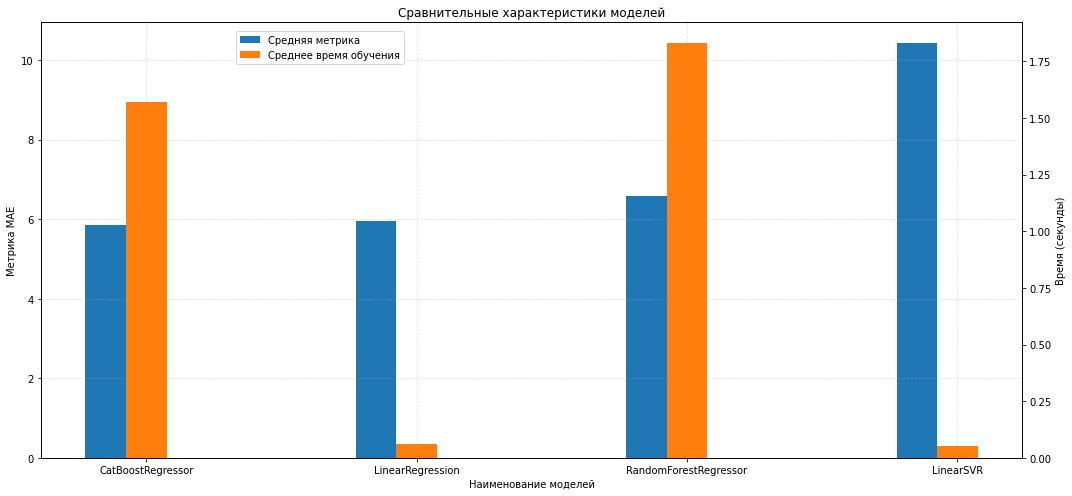

In [126]:
models_compare(best_scores)

**Вывод**:
* Из 4 рассмотренных моделей - 3 преодолели порог метрики на кросс-валидации (MAE ≤ 6.8).
* Лучший результат удалось получить для модели CatBoostRegressor - MAE=5.8538
* Немного уступает по точности LinearRegression - MAE=5.9642, разница около 2%.
* Однако скорость обучения LinearRegression более чем в 20 выше, чем у CatBoostRegressor.
* Исходя из поставленной задачи, при выборе лучшей модели в первую очередь необходимо опираться на качество модели. По этому критерию следует выбрать CatBoostRegressor.
* Если у заказчика, в силу обстоятельств, нет возможности обеспечить необходимую скорость обучения для CatBoostRegressor или необходимо производить прогноз максимально быстро - то хорошей альтернативой будет LinearRegression.

При текущей постановке задачи определим лучшую модель как **CatBoostRegressor**.

Зададим переменную содержащую информацию о лучшей модели:

In [127]:
best_model = grid_search_ensemble.best_estimator_
print('Лучшая модель:', best_model.steps[-1][1].__class__.__name__)

Лучшая модель: CatBoostRegressor


<a href="#point0">Вернуться к оглавлению</a>

### Оценка качества модели на тестовых данных
Рассчитаем метрику MAE лучшей модели на тестовых данных:

In [128]:
y_test_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Метрика MAE на тестовой выборке: {mae_test}')

Метрика MAE на тестовой выборке: 5.903357655746041


**Вывод**: Метрика MAE модели **CatBoostRegressor** на тестовых данных составляет 5.90, что удовлетворяет заданному условию MAE ≤ 6.8

<a href="#point0">Вернуться к оглавлению</a>

### Проверка модели на адекватность
Для проверки модели на адекватность я использую модель **DummyRegressor** из библиотеки `sklearn`.   
Данная модель формирует предсказания на простом принципе - заполняя значения какой-либо постоянной величиной - по умолчанию подставляя среднее значение (`mean`).

In [129]:
# инициализация модели:
dummy_model = DummyRegressor()

# обучение модели на train-выборке:
dummy_model.fit(X_train, y_train)

# формирование предсказаний на основе признаков valid-выборки:
dummy_pred_test = dummy_model.predict(X_test)

# расчет метрики:
mae_dummy = mean_absolute_error(y_test, dummy_pred_test)

# оценка результата:
if mae_test < mae_dummy:
    print("✅ Модель прошла проверку на адекватность: \n  метрика MAE модели",
              f"'{best_model.steps[-1][1].__class__.__name__}' ({mae_test:.2f})",
              f"лучше, чем у случайной ({mae_dummy:.2f})")
else:
    print("Модель нуждается в доработке: метрика качества низкая 👎")

✅ Модель прошла проверку на адекватность: 
  метрика MAE модели 'CatBoostRegressor' (5.90) лучше, чем у случайной (8.20)


Отобразим распределения целевого признака на графике:

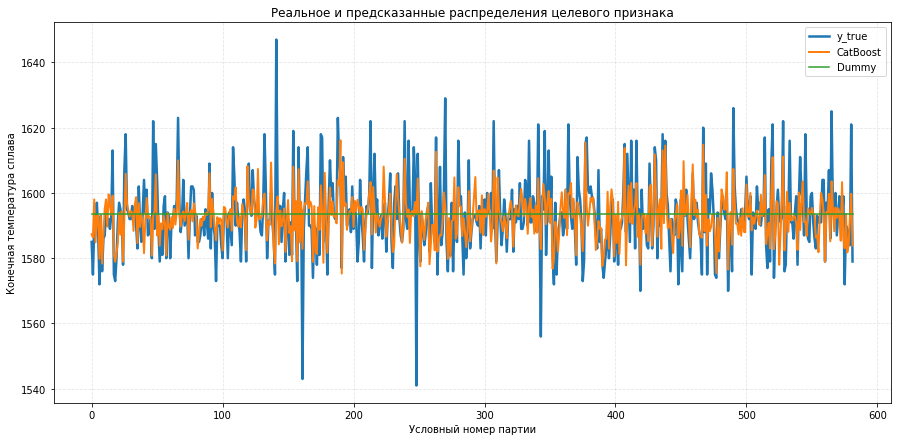

In [130]:
plt.plot(y_test.values, linewidth=2.5, label='y_true')
plt.plot(y_test_pred, linewidth=2, label='CatBoost')
plt.plot(dummy_pred_test, label='Dummy')
plt.title('Реальное и предсказанные распределения целевого признака')
plt.xlabel('Условный номер партии')
plt.ylabel(feature_dsc[target])
plt.legend()
plt.show()

**Вывод**: Модель **CatBoostRegressor** прошла проверку на адекватность показав метрику качества лучше, чем у простейшей Dummy-модели.

<a href="#point0">Вернуться к оглавлению</a>

### Анализ важности признаков
Оценим какие признаки признаны моделью наиболее важными.

Для модели CatBoostRegressor это можно сделать встроенными методами:

In [131]:
df_feat_imp = pd.DataFrame(best_model.named_steps['models'].feature_importances_, 
                           index=X_train.columns, 
                           columns=['Важность признака, %']).sort_values(by='Важность признака, %', 
                                                                         ascending=False)
df_feat_imp

,"Важность признака, %"
heat_duration,23.65
temp_start,22.76
temp_duration,9.15
wire_1,5.26
wire_2,4.91
bulk_6,4.87
bulk_15,3.48
energy_full,3.45
bulk_14,2.92
gas,2.75


Отобразим данные в виде столбчатого графика:

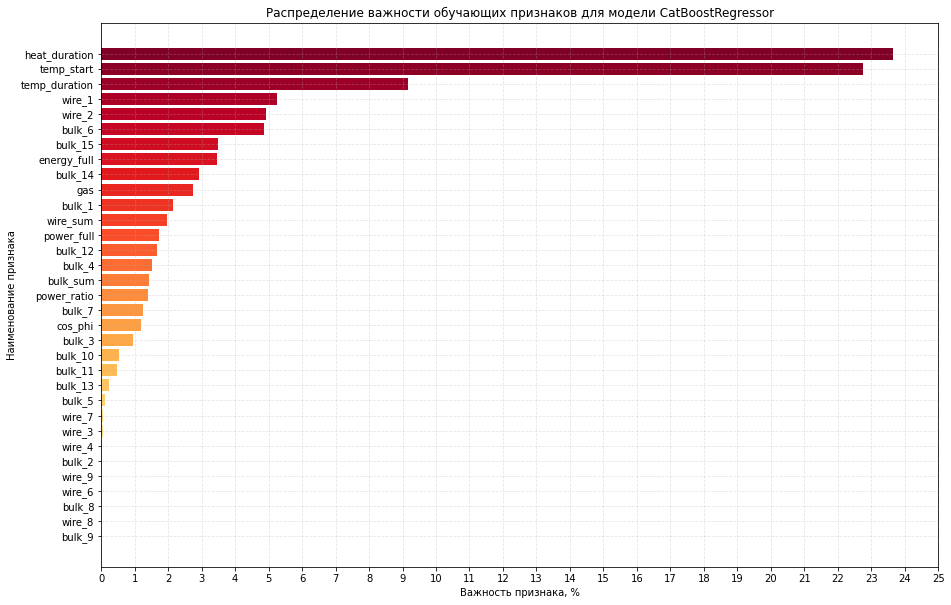

In [132]:
plt.figure(figsize=(15,10))
plt.barh(y=df_feat_imp.index, width=df_feat_imp['Важность признака, %'], 
         color=plt.cm.YlOrRd(np.linspace(1, 0, df_feat_imp.shape[0])))
plt.gca().invert_yaxis(), plt.xticks([i/10 for i in range(0, 251, 10)])
plt.title('Распределение важности обучающих признаков для модели CatBoostRegressor')
plt.xlabel('Важность признака, %')
plt.ylabel('Наименование признака')
plt.show()

Информативно будет изучить влияние признаков с помощью библиотеки SHAP.

Рассчитаем SHAP-значения признаков:

In [133]:
explainer = shap.TreeExplainer(best_model.named_steps['models'])
shap_values = explainer.shap_values(X_train)

Отобразим SHAP-значения на beeswarm-диаграмме:

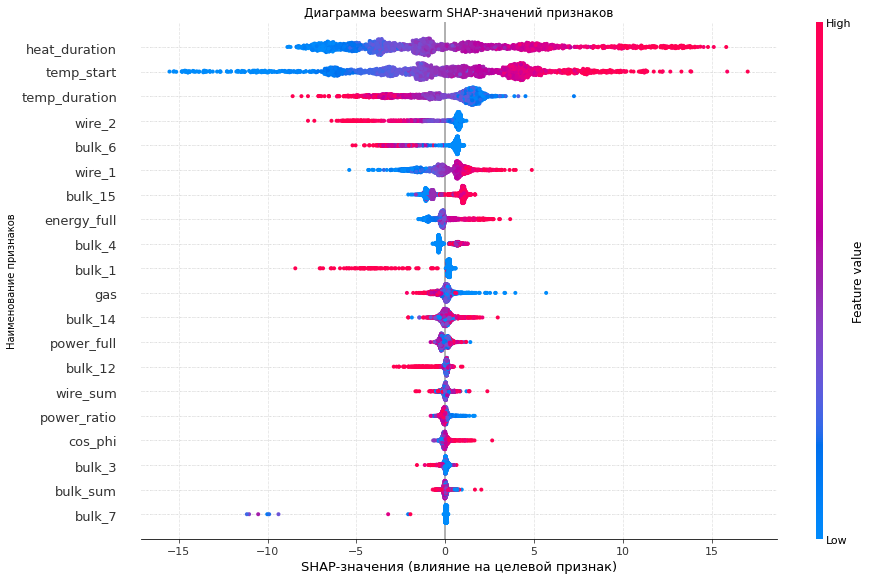

In [134]:
shap.summary_plot(shap_values, X_train, max_display=20, plot_size=(13,8), show=False)
plt.ylabel('Наименование признаков')
plt.xlabel('SHAP-значения (влияние на целевой признак)')
plt.title('Диаграмма beeswarm SHAP-значений признаков')
plt.show()

**Выводы**:
* Оба рассмотренных метода анализа важности признаков указывают на два самых важных обучающих признака - это `heat_duration` (Длительность нагрева) и `temp_start` (Начальная температура сплава). Пара этих признаков составляет почти 50% значимости: 23.65+22.76=46.41%.
* 🔼 Указанные признаки способствуют повышению конечной температуры - на beeswarm-диаграмме можно видеть, что чем дольше время нагрева и чем выше начальная температура, тем выше и конечная температура.
* 🔽 Далее можно выделить группу признаков, которые наоборот способствуют понижению температуры - `temp_duration` (Общее время замера температуры), `wire_2` (Объём проволочных материалов (2)), `bulk_6` и `bulk_1` (Объем сыпучих материалов (6) и (1)). В случае с признаком `temp_duration` - логично, что тем дольше сам процесс обработки металла, тем сильнее сплав стремится остыть. В случае с добавляемыми материалами - можно предположить, что их температура заметно ниже температуры сплава и при добавлении материалов она понижается. Возможно, потеря температуры происходит из-за наступающих химических реакций. Если есть возможность применить альтернативные материалы, которые не вызывали бы такого заметного понижения температуры, то можно было бы добиться снижения затрат энергии.
* 🔼 Вместе с тем, есть ряд добавляемых материалов, добавление которых повышает температуру, к таким относятся: `wire_1`, `bulk_15`,`bulk_4`, `bulk_14`.
* 🔼 Из энергетических характеристик сильнее всего проявляется полная энергия. Чем больше энергия - тем выше конечная температура.
* 🔽 Продувка сплава инертным газом умеренно влияет на конечную температуру - эта процедура понижает температуру.
* Можно отметить, что признаки с суммарным объемом сыпучих и проволочных материалов не оказывают сильного влияния (не более 2%), в отличие от вышерассмотренных номерных материалов. Но также есть ряд материалов, важность которых практически равна 0.

Также можно дополнительно отметить - в топ-3 сильных признаков имеются признаки длительности процессов, именно процесса нагрева и всего процесса обработки металла (суммарное время всех итераций замера температуры). Важность этих признаков указывает на то, что:
1. Время должно фиксироваться достаточно точно.
2. Частота фиксирования времени должна быть оптимальной.

По исходным данным у нас нет информации как производится фиксация температуры для каждого процесса. Можно предположить, что длительность нагрева фиксируется электронными приборами, которые также измеряют мощность, фиксируется четкое время начала и конца цикла нагрева. 

А если говорить про время фиксации температуры - то мы тут просто видим, что в такое время была зафиксирована температура. По этим данным можно рассчитать распределение длительности каждой итерации, например так:

In [135]:
# список для фиксации длительности итерации замера температуры
iteration_duration = []

# рассматривать длительность таких интервалов можно только внутри одной партии;
# цикл перебора значений признака key:
for k in data_temp['key'].unique():
    # расчитываем интервалы и добавляем в наш список, удалив пропуски (для первых итераций)
    iteration_duration.extend(
        pd.to_datetime(data_temp[data_temp['key'] == k]['temp_time'].sort_values())
        .diff().dt.total_seconds().dropna().values
    )

# отобразим данные по временным признакам:
df = pd.DataFrame(iteration_duration).describe()
df.columns = ['Интервал замера температуры']
df['Время нагрева'] = data['heat_duration'].describe()
df['Длительность всего процесса'] = data['temp_duration'].describe()
df

,Интервал замера температуры,Время нагрева,Длительность всего процесса
count,14876.00,2325.00,2325.00
mean,486.34,808.04,2323.42
std,431.13,340.83,1385.57
min,79.00,57.00,339.00
25%,297.00,581.00,1581.00
50%,394.00,778.00,2046.00
75%,548.25,993.00,2793.00
max,14785.00,4189.00,23674.00


Представим данные в виде графиков:

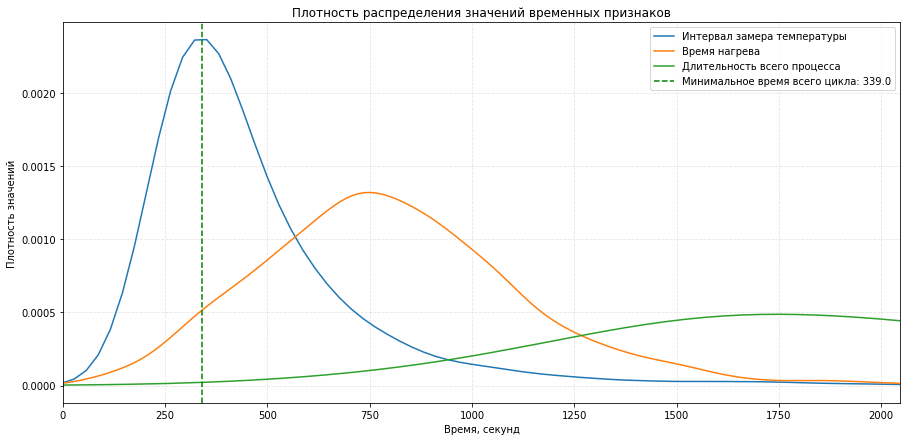

In [136]:
pd.Series(iteration_duration).plot.kde(label='Интервал замера температуры')
data['heat_duration'].plot.kde(label='Время нагрева')
data['temp_duration'].plot.kde(label='Длительность всего процесса')
plt.axvline(data['temp_duration'].min(), color='g', linestyle='dashed', 
            label=f"Минимальное время всего цикла: {data['temp_duration'].min()}")
plt.xlim(0, data['temp_duration'].median())
plt.legend()
plt.title('Плотность распределения значений временных признаков')
plt.xlabel('Время, секунд')
plt.ylabel('Плотность значений')
plt.show()

По графикам видно, что весь процесс занимает, как правило, заметно большую длительность (медиана 2046 секунд), нагрев - чуть меньшую (медиана 778 секунд), а для интервала замера температур медиана составляет 394 секунд. 

На графике есть область, где значения `iteration_duration` и `temp_duration` пересекаются, то есть, наблюдаются такие партии обработки, где <ins>полный процесс занимает меньше времени, чем одна итерация замера в какой-то другой партии</ins> - отсюда возникает вопрос - а насколько сейчас оптимально фиксируется температура? 

Например, 394 секунды это около 6.5 минут -- если на очередной итерации измерения температуры сплав достиг необходимой температуры через (предположим) 1 минуту, то остальные 5.5 минут он будет "ждать" пока температура зафиксируется и процесс завершится. 

Оптимальная частота замера температуры (вместе с точностью замера, естественно!) позволит также оптимизировать потребляемую энергию. 

Это рассуждение следует принять ко вниманию, хотя оно построено лишь на предположениях - точной информации о технологическом процессе у нас нет.

<a href="#point0">Вернуться к оглавлению</a>

## Общий вывод и рекомендации заказчику
Для данных предоставленных металлургическим комбинатом «Стальная птица», содержащих данные о деталях технологического процесса обработки стали с поставленной целью, которая состоит в снижении энергопотребления благодаря применению моделируемого технологического процесса и контролю температуры сплава - было проведено исследование, в рамках которого:
1. Произведено предварительное изучение данных:
* Проверена корректность и соответствие предоставленных данных заявленным заказчиком
2. Проведены исследовательский анализ и предобработка данных. 
* Изучено распределение представленных данных. Обработаны аномалии. Для ряда признаков заполнены пропуски данных. Заголовки датасетов переименованы в соответствии со стандартом оформления данных.
3. На основе имеющихся данных сгенерированы новые признаки описывающий технологический процесс. 
* Новые признаки: Полная мощность, Коэффициент мощности, Отношение реактивной мощности к активной, Продолжительность нагрева, Полная энергия, Суммарный объем добавленных сыпучих материалов, Начальная температура, Конечная температура, Длительность процесса обработки, Суммарный объем добавленных проволочных материалов.
4. Имеющиеся данные объединены в один датасет. В качестве ключа объединения использовался номер партии (признак key)
5. Проведены исследовательский анализ и предобработка нового набора данных. Изучено распределение представленных данных. Удалены малоинформативные признаки.
6. Проведен корреляционный анализ. Для расчета корреляции использован коэффициент $\phi_k$, поскольку он лучше отражает нелинейные зависимости.
* Определены признаки демонстрирующие наибольшую корреляцию с целевым признаком, например: bulk_7, wire_4, bulk_2, wire_7, wire_3
* Определены признаки обладающие мультиколлинеарностью: cos_phi, power_ratio, bulk_2, bulk_7, bulk_8
* Определены признаки демонстрирующие очень слабую корреляцию с целевым признаком, например: cos_phi, power_ratio, bulk_3, bulk_8, bulk_9
7. Для решения задачи регрессии - предсказания конечной температуры сплава - произведено обучение и поиск лучшей модели.
* Для решения задачи исследовалось 2 типа моделей машинного обучения:
  * Линейные модели
  * Ансамблевые модели. 
* В качестве линейных моделей рассмотрены LinearRegression и LinearSVR
* Для обучения линейных моделей был дополнительно отобран список обучающих признаков с целью устранить мультиколлинеарность.
* Поиск моделей осуществлялся с помощью пайплайна - инструмента, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.
* Для линейных моделей удалось достичь следующих результатов на кросс-валидации:
  * LinearRegression: MAE=5.964194	
  * LinearSVR: MAE=10.427036
* В качестве ансамблевых моделей рассмотрены RandomForestRegressor и CatBoostRegressor
* Модели обучались на полном наборе имеющихся признаков с помощью пайплайна.
* Получены результаты на кросс-валидации:
  * CatBoostRegressor: MAE=5.853761
  * RandomForestRegressor: MAE=6.573341
* На основе списка обученных моделей произведен анализ результатов и выбрана лучшая модель
* По критерию качества лучшей моделью признана **CatBoostRegressor**
* Качество лучшей модели оценено на тестовых данных. Метрика MAE на тестовой выборке: 5.90 ✅, что удовлетворяет заданному условию MAE ≤ 6.8.
* Модель CatBoostRegressor прошла проверку на адекватность: метрика MAE модели (5.90) лучше, чем у случайной (8.20)
* На основе полученной модели, произведен анализ важности обучающих признаков.
  * Два самых важных обучающих признака - это `heat_duration` (Длительность нагрева) и `temp_start` (Начальная температура сплава). Пара этих признаков составляет почти 50% значимости: 23.65+22.76=46.41%. Указанные признаки способствуют повышению конечной температуры - на диаграмме важности признаков можно видеть, что чем дольше время нагрева и чем выше начальная температура, тем выше и конечная температура.
  * Группа признаков, которая оказывает заметное влияние на температуру, только наоборот способствуют ее понижению - `temp_duration` (Общее время замера температуры), `wire_2` (Объём проволочных материалов (2)), `bulk_6` и `bulk_1` (Объем сыпучих материалов (6) и (1)). В случае с признаком `temp_duration` - логично, что тем дольше сам процесс обработки металла, тем сильнее сплав стремится остыть. В случае с добавляемыми материалами - можно предположить, что их температура заметно ниже температуры сплава и при добавлении материалов они охлаждают сплав. Возможно, потеря температуры происходит из-за наступающих химических реакций. Если есть возможность применить альтернативные материалы, которые не вызывали бы такого заметного понижения температуры, то можно было бы добиться снижения затрат энергии.
  * Ряд материалов, добавление которых повышает температуру, к таким относятся: `wire_1`, `bulk_15`,`bulk_4`, `bulk_14`.
  * Из энергетических характеристик сильнее всего проявляется полная энергия. Чем больше полная энергия - тем выше конечная температура.
  * Продувка сплава инертным газом умеренно влияет на конечную температуру - эта процедура немного снижает температуру.
  * Можно отметить, что признаки с суммарным объемом сыпучих и проволочных материалов не оказывают сильного влияния (не более 2%), в отличие от вышерассмотренных номерных материалов. Есть ряд материалов, важность которых практически равна 0.
  * Остальные обучающие признаки не оказывают значительного влияния на целевой признак.

Можно дополнительно отметить - в топ-3 сильных признаков имеются признаки длительности процессов. Важность этих признаков указывает на то, что:
1. Время операций должно фиксироваться достаточно точно.
2. Частота фиксирования времени должна быть оптимальной.

На основании вышеизложенного можно заключить:
1. Ключевые факторы повышения температуры сплава
* Длительность нагрева и начальная температура. Эти признаки составляют ~46% важности, что подчёркивает их доминирующую роль в достижении высокой конечной температуры сплава. Длительный нагрев и высокая начальная температура обеспечивают накопление тепловой энергии, необходимой для плавления и поддержания жидкой фазы сплава.
  * Дополнительные рекомендации.
    * Оптимизация начальной температуры. Если возможно, обеспечить для сплава оптимальную начальную температуру. Это поможет сократить необходимую длительность нагрева, снижая энергопотребление.
    * Контроль длительности нагрева. Убедиться, что длительность нагрева оптимальна. Слишком короткое время может не обеспечить нужной температуры, а слишком длинное — привести к избыточным затратам энергии. Можно использовать полученную в рамках данного исследования модель для прогнозирования минимально необходимого времени нагрева в зависимости от начальной температуры.
* Полная энергия. Имеет сильное влияние на конечную температуру, что ожидаемо, так как она отражает общее количество энергии, переданное сплаву.
  * Дополнительные рекомендации:
    * Оптимизация энергетического режима. Добиться увеличения коэффициента мощности, чтобы минимизировать реактивную мощность и повысить долю активной мощности, которая непосредственно нагревает сплав.
2. Факторы, снижающие температуру сплава
* Общее время цикла обработки. Длительный процесс обработки способствует охлаждению сплава, вероятно, из-за теплопотерь в окружающую среду или пауз в нагреве.
  * Дополнительные рекомендации: 
    * Сокращение времени обработки: Оптимизировать процесс, чтобы минимизировать время между нагревом и замерами температуры. Например, сократив количество замеров или использовав более быстрые методы измерения.
    * Улучшение теплоизоляции на всех этапах, где есть такая возможность.

Разработанная модель позволяет с высокой точностью прогнозировать конечную температуру сплава в процессе обработки, основываясь на ключевых признаках, таких как длительность нагрева и начальная температура. Это даёт возможность оптимизировать технологический процесс, избегая избыточного нагрева, что снижает энергопотребление и затраты. Кроме того, модель способствует уменьшению термической нагрузки на оборудование, продлевая его срок службы, и повышает стабильность процесса, обеспечивая более предсказуемое качество сплава.

<a href="#point0">Вернуться к оглавлению</a>